# Load Data

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


# 1. Single Curve
## 1-1. Two parameters

../../Figs/curve_fitting/powerlaw2/single/ already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [-1.25369366 -0.22275764]
 - Curve Fitting Cost: 2.415589981766477

 - Curve Fitting Parameters: [-1.73185722 -0.10005743]
 - Curve Fitting Cost: 56.969692800075414



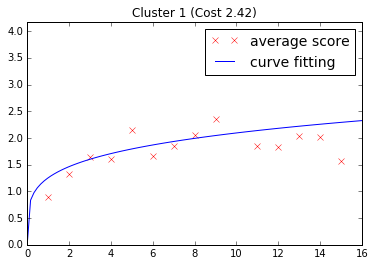

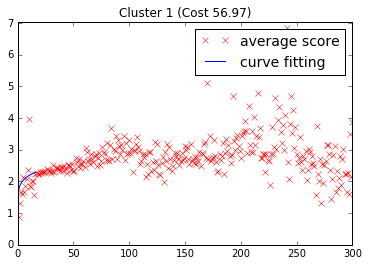

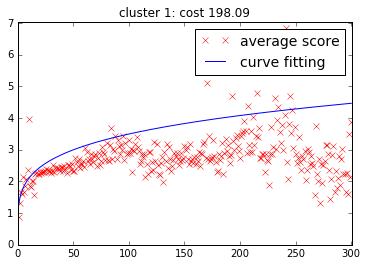

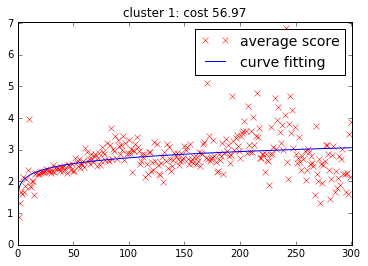

cluster 2:
 - Curve Fitting Parameters: [-2.11124789  0.0128409 ]
 - Curve Fitting Cost: 2.251070699174714

 - Curve Fitting Parameters: [-1.6158698  -0.12448687]
 - Curve Fitting Cost: 60.474679045945926



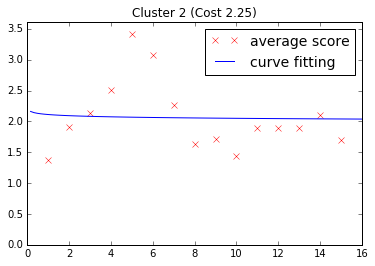

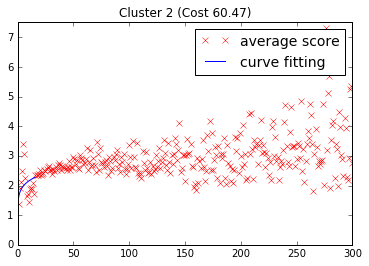

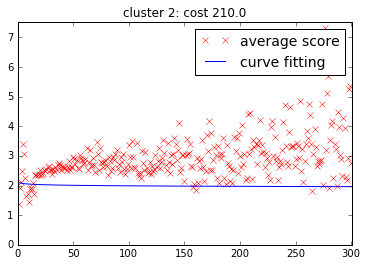

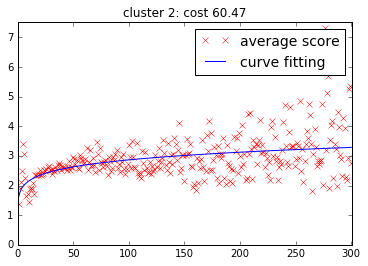

cluster 3:
 - Curve Fitting Parameters: [-1.88187197 -0.05148954]
 - Curve Fitting Cost: 1.2224334122509872

 - Curve Fitting Parameters: [-1.48804894 -0.13541212]
 - Curve Fitting Cost: 85.73835179545975



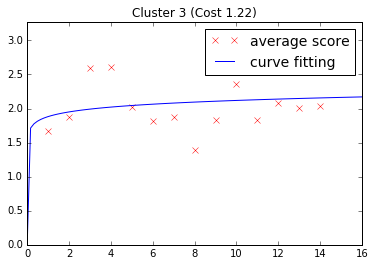

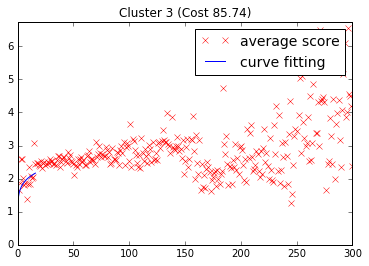

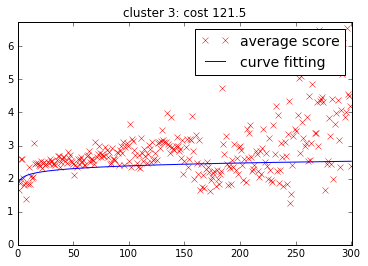

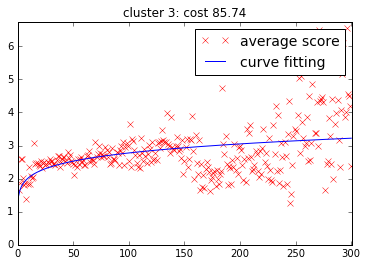

cluster 4:
 - Curve Fitting Parameters: [-1.42901173 -0.14594032]
 - Curve Fitting Cost: 3.1440160500601966

 - Curve Fitting Parameters: [-2.29588181 -0.02580887]
 - Curve Fitting Cost: 82.3754193028027



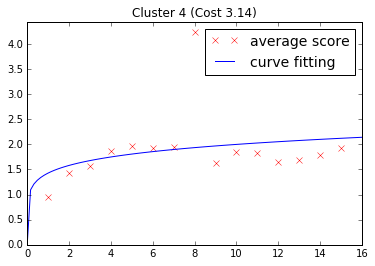

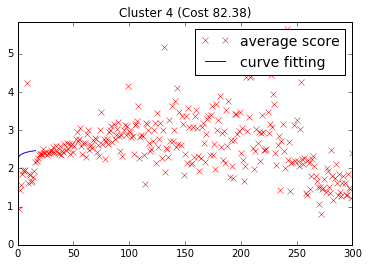

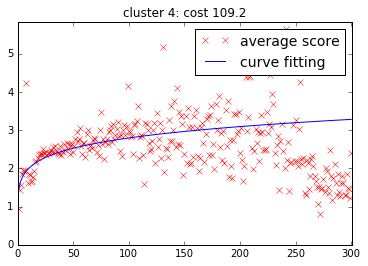

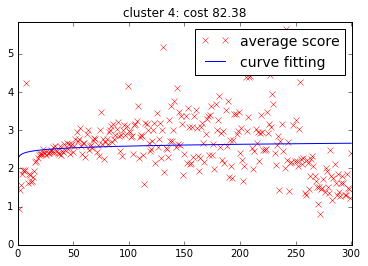

cluster 5:
 - Curve Fitting Parameters: [-0.50369394 -0.56646241]
 - Curve Fitting Cost: 1.2735734069459042

 - Curve Fitting Parameters: [-1.46586169 -0.12835121]
 - Curve Fitting Cost: 22.190075282343635



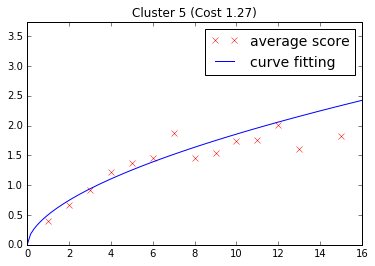

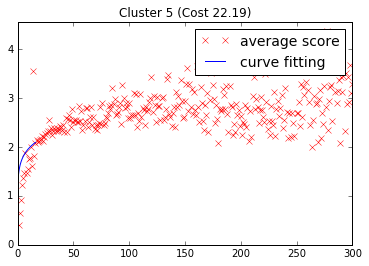

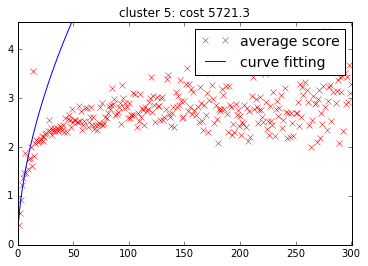

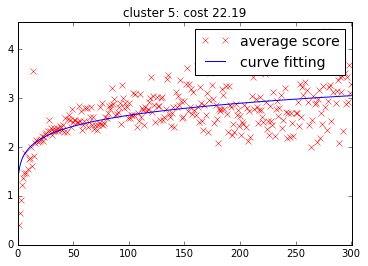

cluster 6:
 - Curve Fitting Parameters: [-0.7706417  -0.40877159]
 - Curve Fitting Cost: 1.9071504219087845

 - Curve Fitting Parameters: [-1.87209989 -0.06116271]
 - Curve Fitting Cost: 31.80026224179893



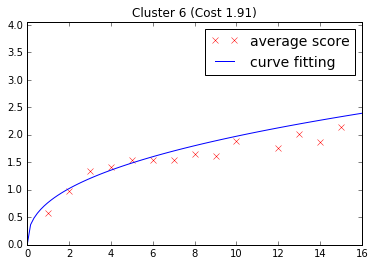

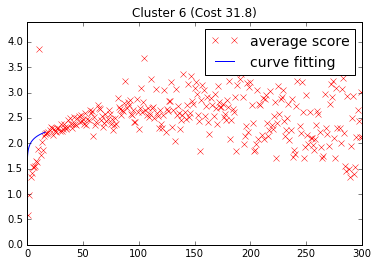

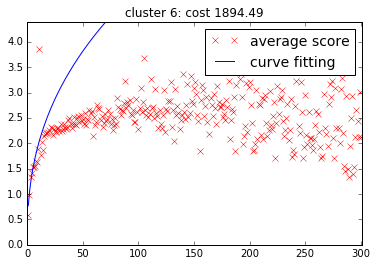

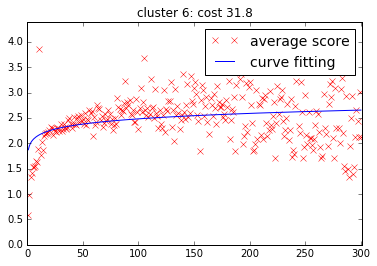

cluster 7:
 - Curve Fitting Parameters: [-2.60960163  0.10557361]
 - Curve Fitting Cost: 1.5859668173293413

 - Curve Fitting Parameters: [-1.96924684 -0.07499623]
 - Curve Fitting Cost: 54.32367872442434



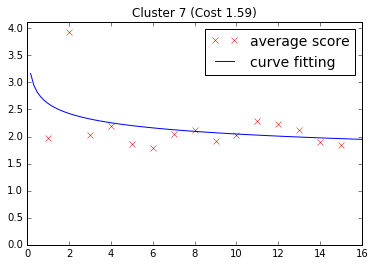

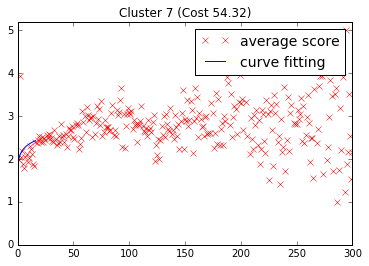

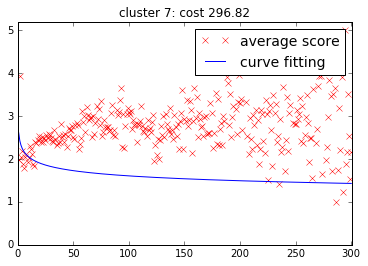

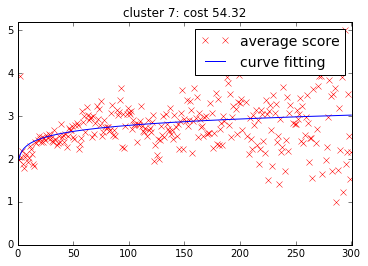

cluster 8:
 - Curve Fitting Parameters: [-0.91280269 -0.3429668 ]
 - Curve Fitting Cost: 2.066261014322972

 - Curve Fitting Parameters: [-1.92903031 -0.05172978]
 - Curve Fitting Cost: 24.830029506379073



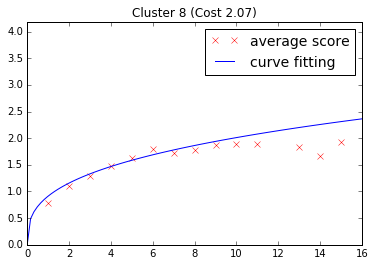

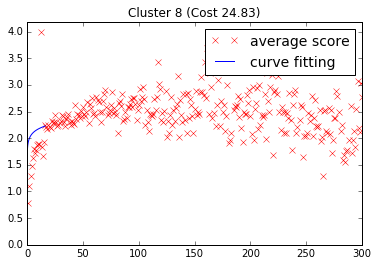

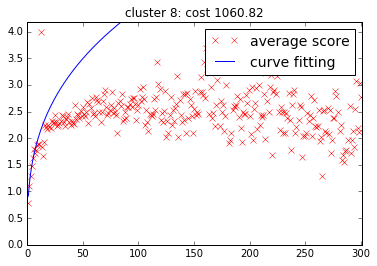

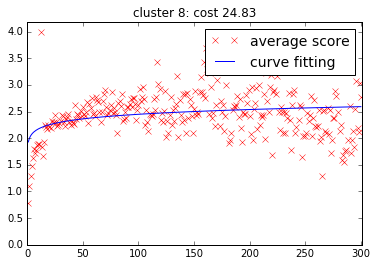

cluster 9:
 - Curve Fitting Parameters: [-0.74699765 -0.43313674]
 - Curve Fitting Cost: 1.9246896096063684

 - Curve Fitting Parameters: [-1.54798646 -0.11416553]
 - Curve Fitting Cost: 37.625695527205366



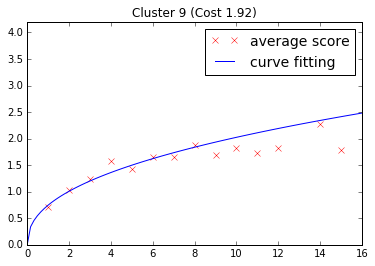

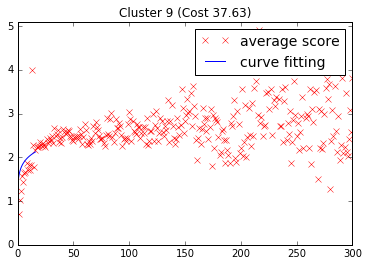

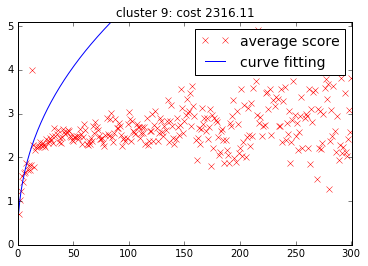

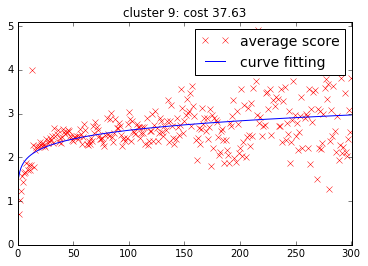

cluster 10:
 - Curve Fitting Parameters: [-1.18065459 -0.21989291]
 - Curve Fitting Cost: 1.543440575874525

 - Curve Fitting Parameters: [-1.49167908 -0.12987322]
 - Curve Fitting Cost: 36.544646205852175



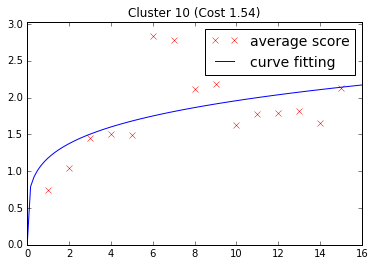

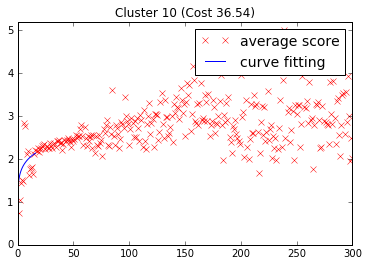

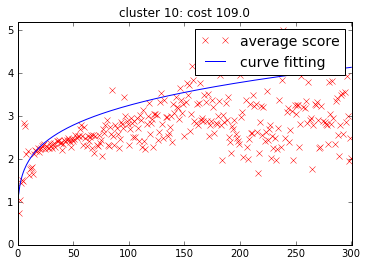

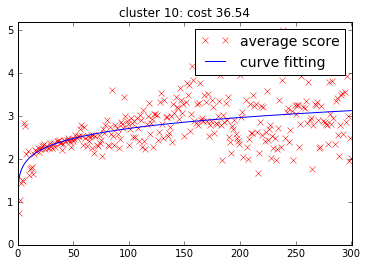

cluster 11:
 - Curve Fitting Parameters: [-1.17725157 -0.23818584]
 - Curve Fitting Cost: 3.133730336376219

 - Curve Fitting Parameters: [-1.74481161 -0.09179923]
 - Curve Fitting Cost: 43.67018795538543



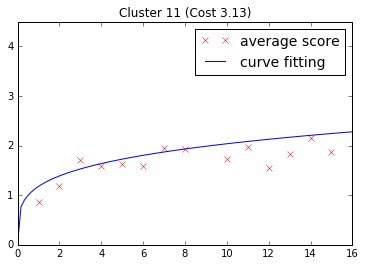

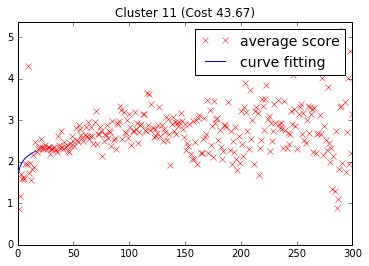

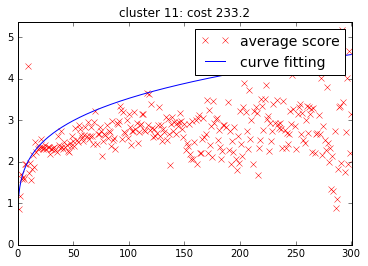

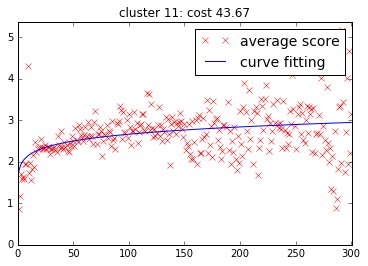

cluster 12:
 - Curve Fitting Parameters: [-3.57315154  0.27608634]
 - Curve Fitting Cost: 1.9112229453343912

 - Curve Fitting Parameters: [-0.95168732 -0.2578463 ]
 - Curve Fitting Cost: 128.54870891291097



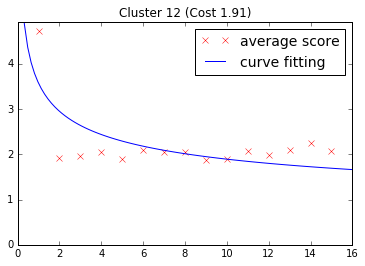

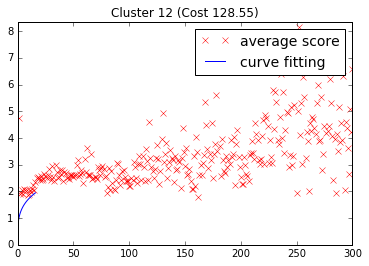

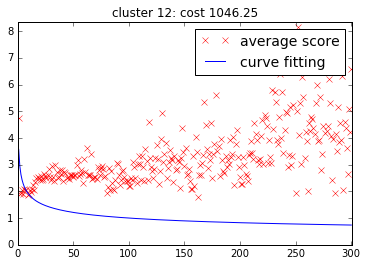

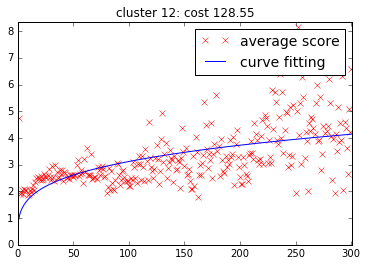

cluster 13:
 - Curve Fitting Parameters: [-0.50529492 -0.60712512]
 - Curve Fitting Cost: 2.034290050146917

 - Curve Fitting Parameters: [-1.3188607  -0.15224467]
 - Curve Fitting Cost: 31.091695512822742



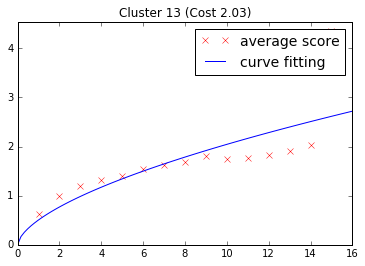

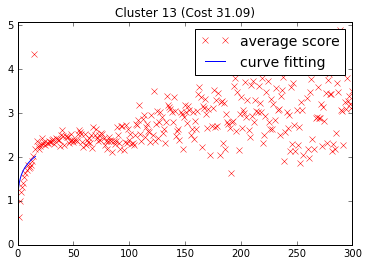

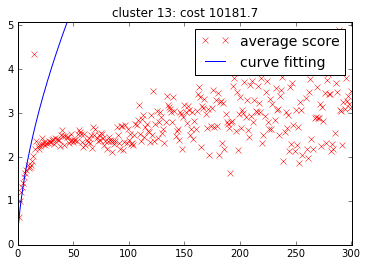

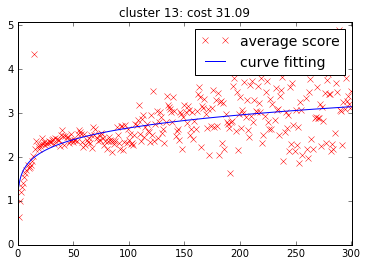

In [24]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw2/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw2/single/dummy", clt_num = i+1)
    
    y_fit_valid = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    y_fit_true = cv.powerlaw_curve2(attempts300, true_opt[0], true_opt[1])
    
    pl2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl2_cost_ture = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw2/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_valid)

    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw2/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_ture)

## 1-2. Three parameters

../../Figs/curve_fitting/powerlaw3/single/ already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 1.58846167  0.74153807  2.40126545]
 - Curve Fitting Cost: 2.21459303863667

 - Curve Fitting Parameters: [ 2.75263143  0.27074475  3.58675117]
 - Curve Fitting Cost: 55.73546414366619



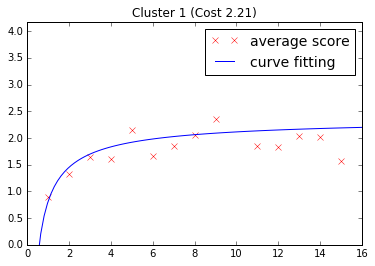

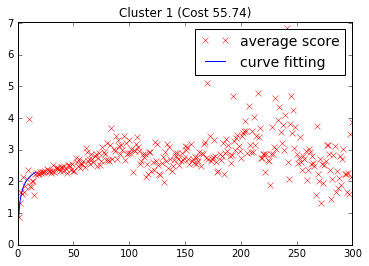

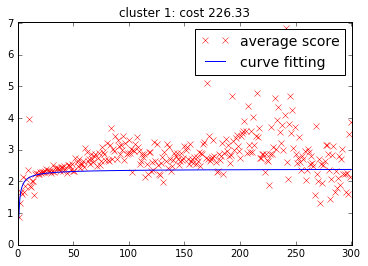

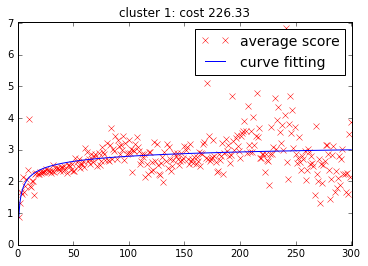

cluster 2:
 - Curve Fitting Parameters: [ 0.74747264  3.91535501  2.11573181]
 - Curve Fitting Cost: 1.9960584847278635

 - Curve Fitting Parameters: [  7.24643317e+02   4.40646585e-04   7.26065553e+02]
 - Curve Fitting Cost: 61.04555782420101



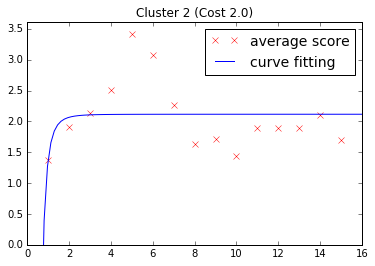

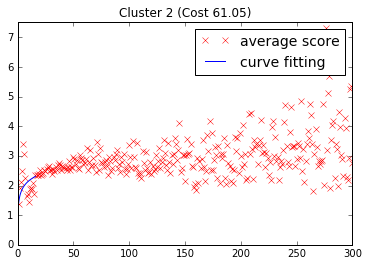

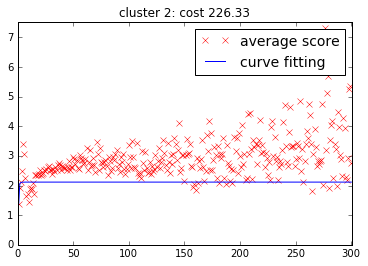

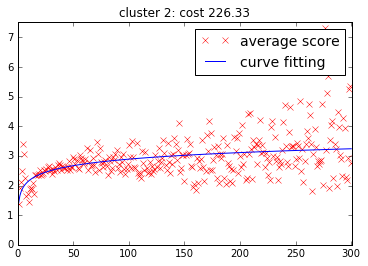

cluster 3:
 - Curve Fitting Parameters: [ 0.44284423  3.9491221   2.10461713]
 - Curve Fitting Cost: 1.1782871234560401

 - Curve Fitting Parameters: [  9.24030443e+02   3.49266578e-04   9.25351626e+02]
 - Curve Fitting Cost: 86.84048971217695



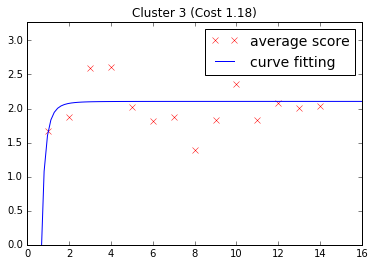

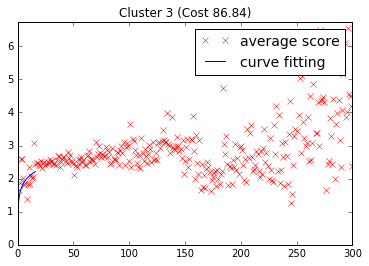

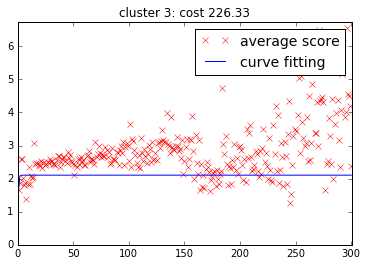

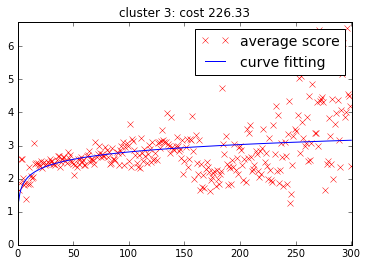

cluster 4:
 - Curve Fitting Parameters: [ 1.18889089  1.34360661  2.07239457]
 - Curve Fitting Cost: 2.8485701650783386

 - Curve Fitting Parameters: [ 2.05870791  0.79591652  2.67170208]
 - Curve Fitting Cost: 79.21105287272339



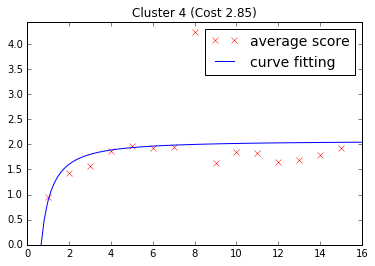

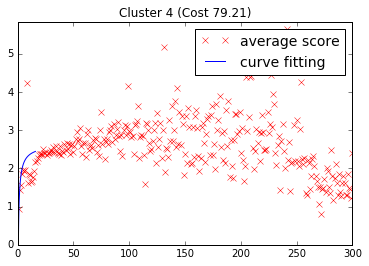

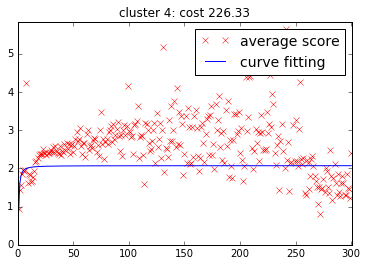

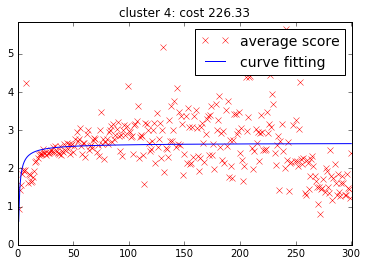

cluster 5:
 - Curve Fitting Parameters: [  1.66939947e+03   4.32129638e-04   1.66961932e+03]
 - Curve Fitting Cost: 1.324784355879242

 - Curve Fitting Parameters: [ 3.40313805  0.31633486  3.51277078]
 - Curve Fitting Cost: 19.786481612613



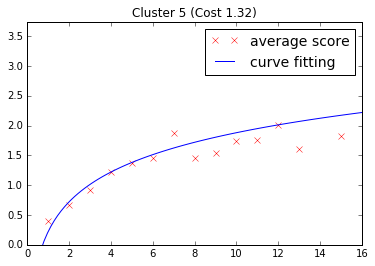

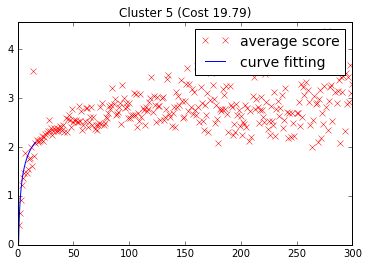

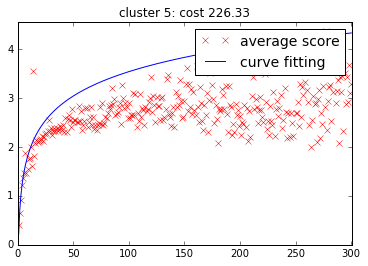

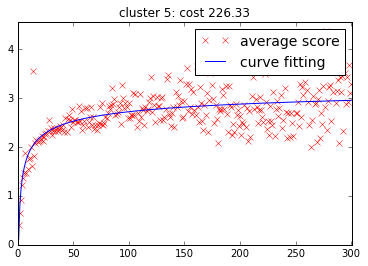

cluster 6:
 - Curve Fitting Parameters: [  3.99979647e+02   1.56796931e-03   4.00532368e+02]
 - Curve Fitting Cost: 1.876322896072682

 - Curve Fitting Parameters: [ 2.46922442  0.64034344  2.66156992]
 - Curve Fitting Cost: 28.465433197411205



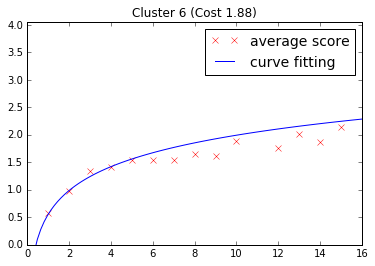

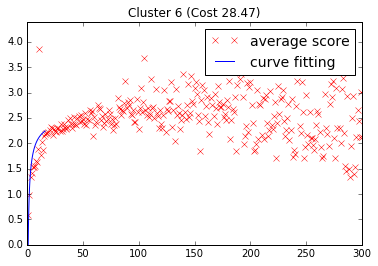

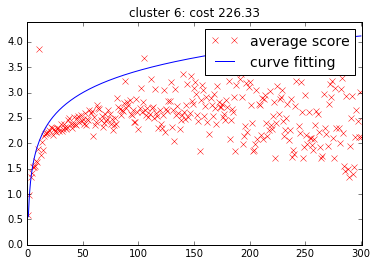

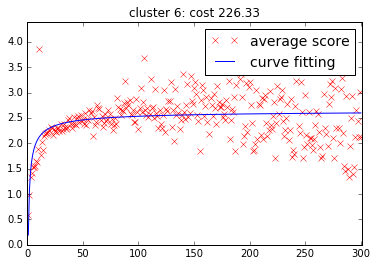

cluster 7:
 - Curve Fitting Parameters: [ -5.87883984e+02   4.11222128e-04  -5.85283220e+02]
 - Curve Fitting Cost: 1.5812358418444366

 - Curve Fitting Parameters: [  2.13565799e+02   9.29076016e-04   2.15443963e+02]
 - Curve Fitting Cost: 54.36288646423188



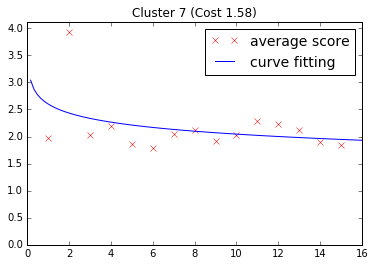

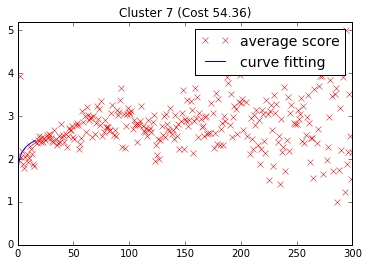

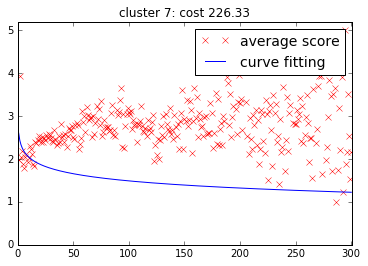

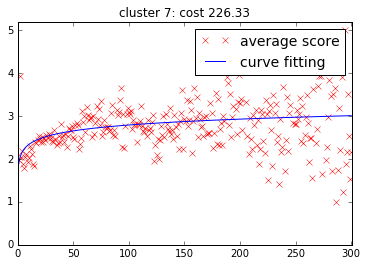

cluster 8:
 - Curve Fitting Parameters: [  5.04024485e+01   1.12451608e-02   5.11398932e+01]
 - Curve Fitting Cost: 2.035118520905256

 - Curve Fitting Parameters: [ 2.17966558  0.67483433  2.58923213]
 - Curve Fitting Cost: 22.173811305951595



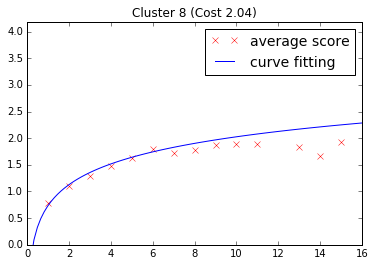

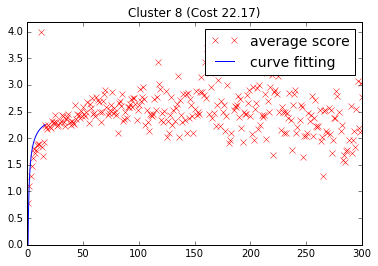

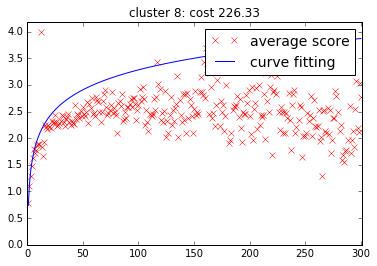

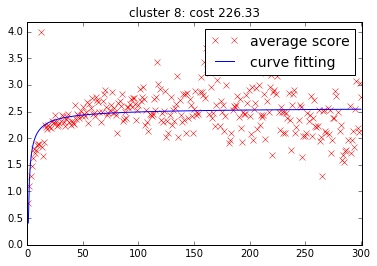

cluster 9:
 - Curve Fitting Parameters: [  1.76944503e+03   3.59323243e-04   1.77001679e+03]
 - Curve Fitting Cost: 1.9796259071421056

 - Curve Fitting Parameters: [ 2.93694535  0.24418949  3.62525492]
 - Curve Fitting Cost: 36.71596216838046



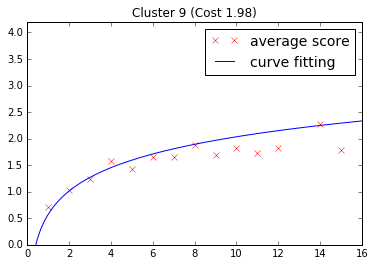

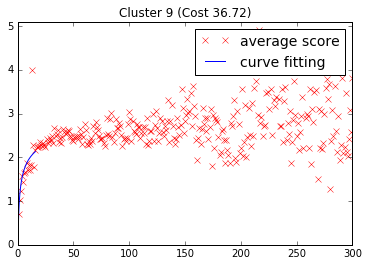

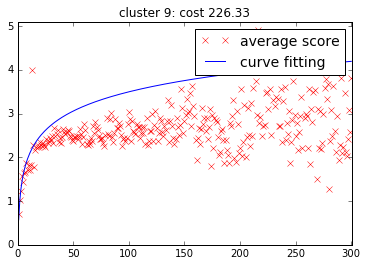

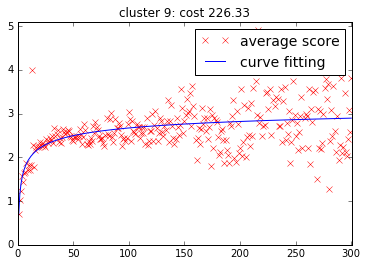

cluster 10:
 - Curve Fitting Parameters: [ 1.53010728  0.95750973  2.15201357]
 - Curve Fitting Cost: 1.231047488106504

 - Curve Fitting Parameters: [ 4.82167481  0.10337729  5.74853709]
 - Curve Fitting Cost: 36.03779599343011



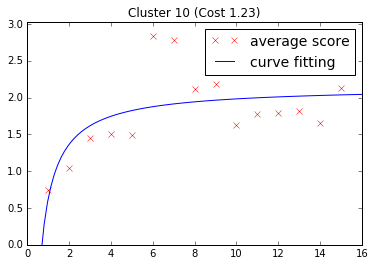

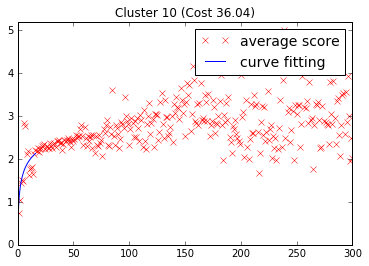

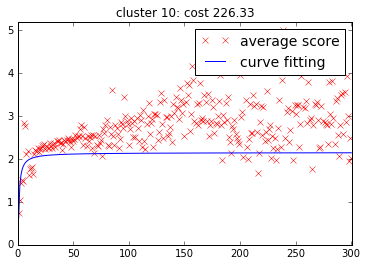

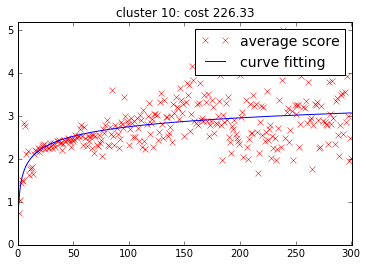

cluster 11:
 - Curve Fitting Parameters: [ 1.66562722  0.62154185  2.45409599]
 - Curve Fitting Cost: 2.97630692929139

 - Curve Fitting Parameters: [ 2.4659405   0.33170035  3.24866881]
 - Curve Fitting Cost: 42.44369708878345



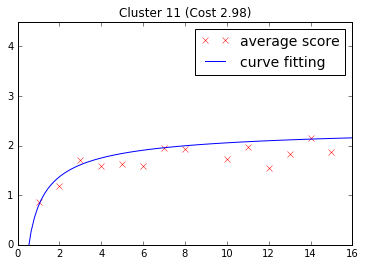

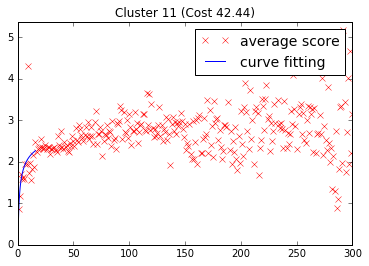

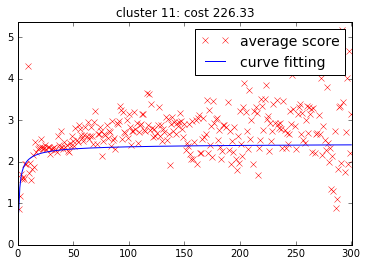

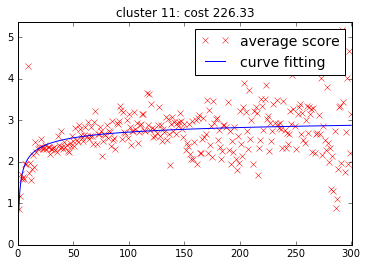

cluster 12:
 - Curve Fitting Parameters: [ -2.71352164  34.88051406   2.01811853]
 - Curve Fitting Cost: 0.06883115712372502

 - Curve Fitting Parameters: [  3.00577971e+03   1.94915368e-04   3.00632780e+03]
 - Curve Fitting Cost: 138.97074292716889



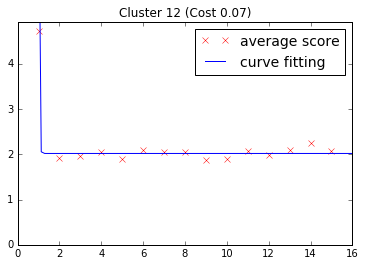

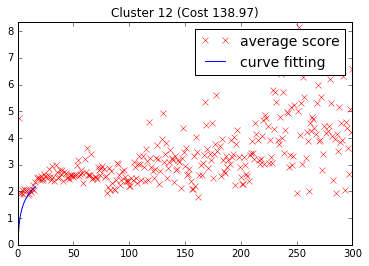

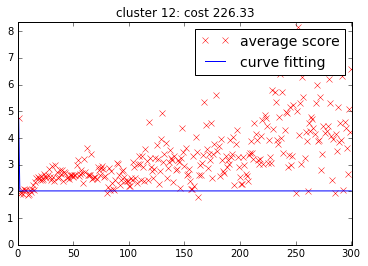

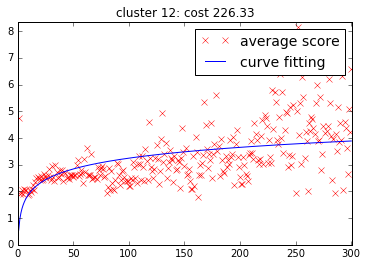

cluster 13:
 - Curve Fitting Parameters: [  3.51555621e+03   2.08863767e-04   3.51591359e+03]
 - Curve Fitting Cost: 2.363120661593729

 - Curve Fitting Parameters: [  7.04277787e+01   5.44704858e-03   7.13731916e+01]
 - Curve Fitting Cost: 30.91339730055933



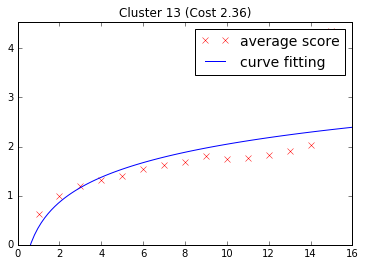

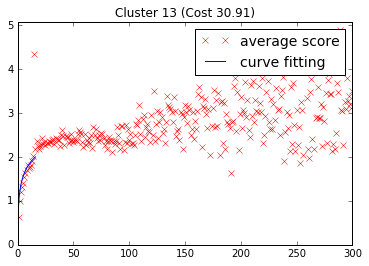

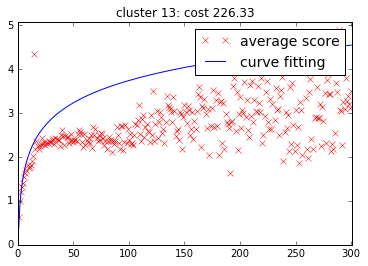

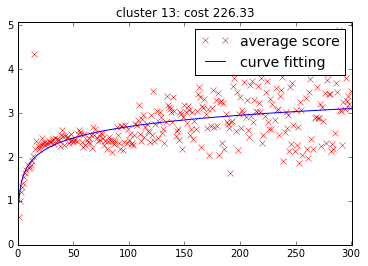

In [26]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw3/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw3/single/dummy", clt_num = i+1)
    
    y_fit_valid = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    y_fit_true = cv.powerlaw_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    pl3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw3/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl3_cost300)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw3/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl3_cost300)

## 1-3. Four parameters

cluster 1:
 - Curve Fitting Parameters: [  5.89047057e+10   8.44910998e+00   2.18133431e+00   1.72070967e+01]
 - Curve Fitting Cost: 2.1567533655103817

 - Curve Fitting Parameters: [  1.53358179e+09   4.28542326e+00   2.96390436e+00   1.28936578e+02]
 - Curve Fitting Cost: 55.49301305471018



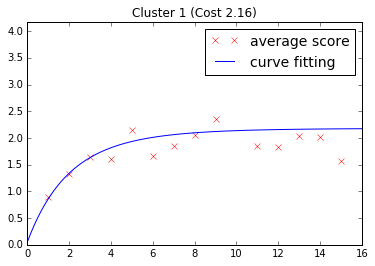

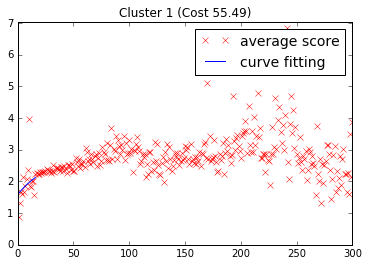

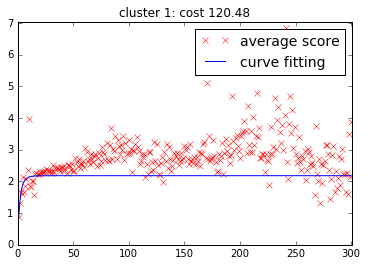

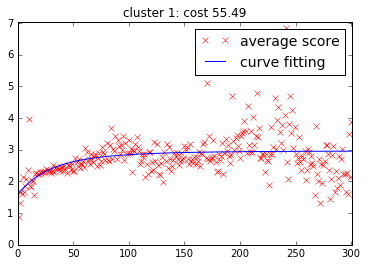

cluster 2:
 - Curve Fitting Parameters: [ 27.71559661   5.48307795   2.11816627   0.93103673]
 - Curve Fitting Cost: 1.992991648464694

 - Curve Fitting Parameters: [  9.45724676e+02   3.09877045e-02   7.25067470e+02   5.87997303e+03]
 - Curve Fitting Cost: 59.71934298711665



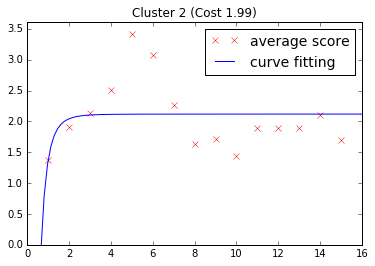

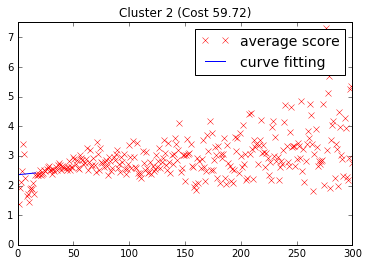

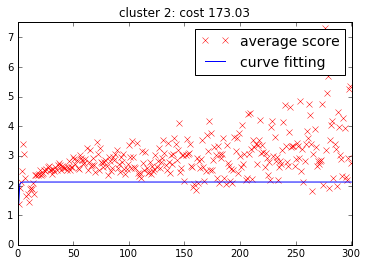

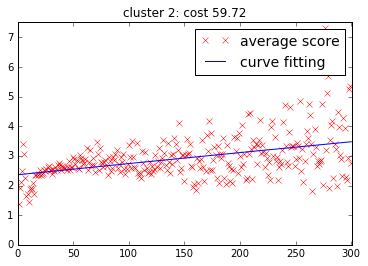

cluster 3:
 - Curve Fitting Parameters: [ 17.58198171   5.71504576   2.10559853   0.90262802]
 - Curve Fitting Cost: 1.1771108236848264

 - Curve Fitting Parameters: [  2.70821267e+03   3.45365290e-02   1.94215519e+03   1.56791335e+04]
 - Curve Fitting Cost: 81.17817117313095



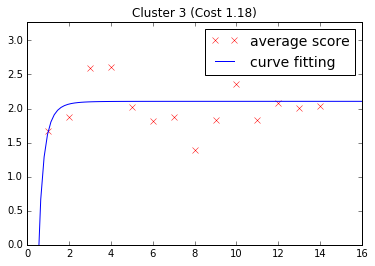

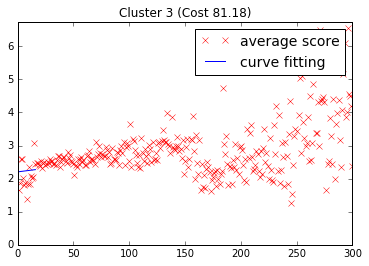

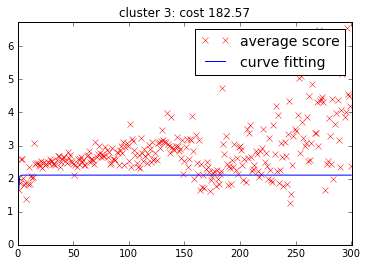

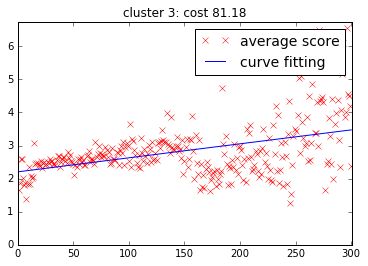

cluster 4:
 - Curve Fitting Parameters: [  5.63418730e+12   1.08107157e+01   2.04301570e+00   1.39339636e+01]
 - Curve Fitting Cost: 2.7892584574033275

 - Curve Fitting Parameters: [  2.81061376e+14   7.38481956e+00   2.65290018e+00   8.68702879e+01]
 - Curve Fitting Cost: 78.25634167305304



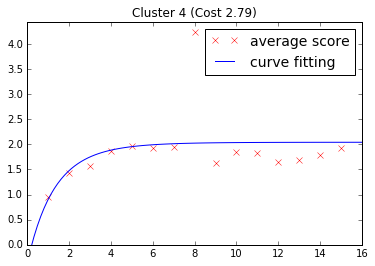

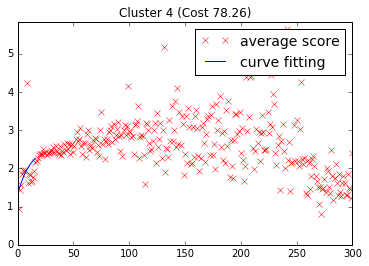

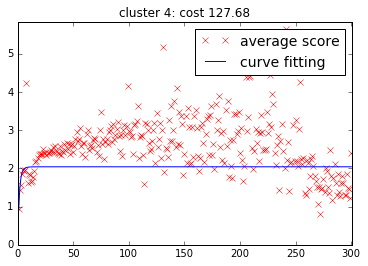

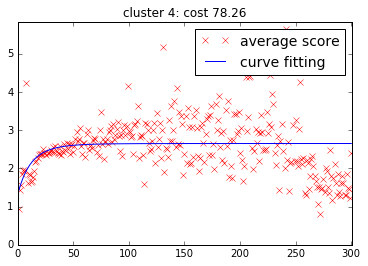

cluster 5:
 - Curve Fitting Parameters: [  1.83660042e+02   6.94896718e-03   1.82275903e+02   3.18277007e+00]
 - Curve Fitting Cost: 1.2765088324559581

 - Curve Fitting Parameters: [ 4.93457575  0.51569581  3.19128951  1.88646418]
 - Curve Fitting Cost: 19.691381528192057



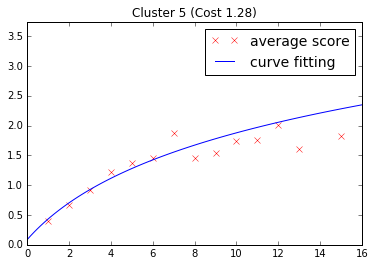

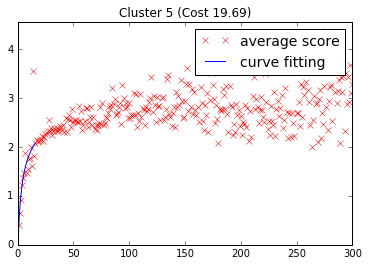

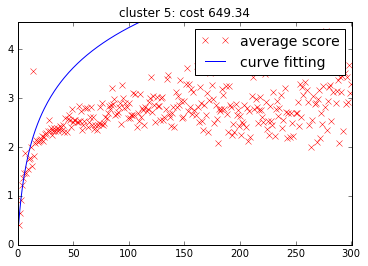

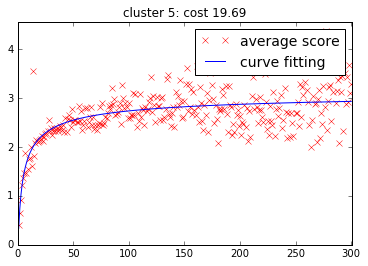

cluster 6:
 - Curve Fitting Parameters: [  7.21898939e+04   3.51811576e+00   2.52907757e+00   1.90816814e+01]
 - Curve Fitting Cost: 1.8682579616205535

 - Curve Fitting Parameters: [  5.02911574e+03   2.69051543e+00   2.57256600e+00   1.80141245e+01]
 - Curve Fitting Cost: 27.82281462156878



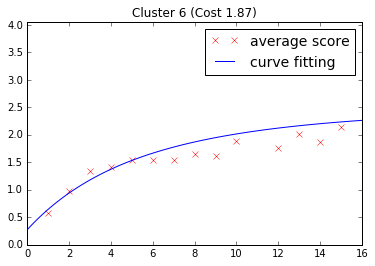

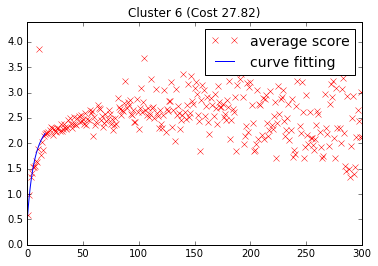

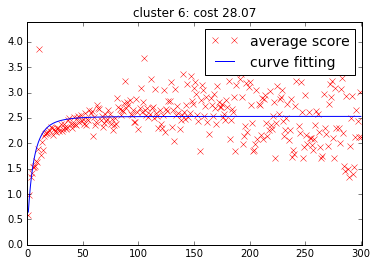

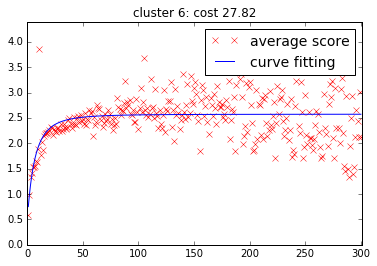

cluster 7:
 - Curve Fitting Parameters: [-1121.55634263     2.98040343     1.89188372    10.64246129]
 - Curve Fitting Cost: 1.543123751160677

 - Curve Fitting Parameters: [  2.69542048e+07   3.42583466e+00   2.98642391e+00   1.51830422e+02]
 - Curve Fitting Cost: 53.90940403745783



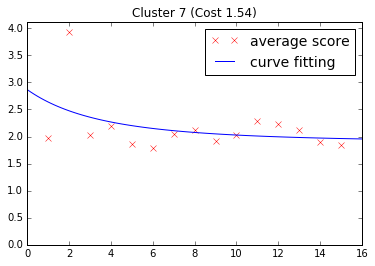

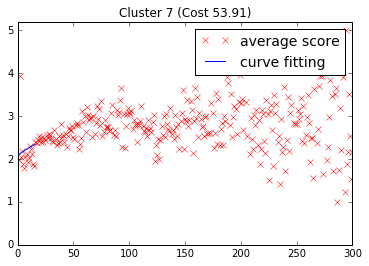

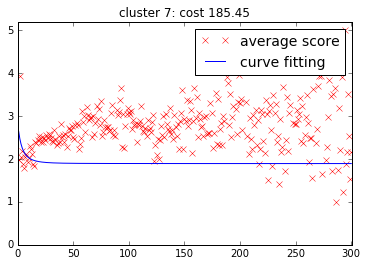

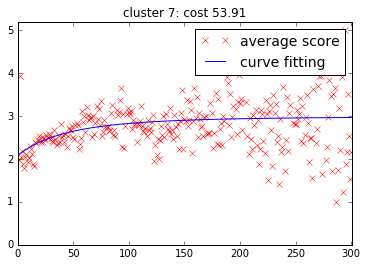

cluster 8:
 - Curve Fitting Parameters: [  4.27167002e+06   4.73445541e+00   2.38156064e+00   2.17714988e+01]
 - Curve Fitting Cost: 2.012494532438276

 - Curve Fitting Parameters: [  9.90762586e+03   2.95246874e+00   2.52088673e+00   1.80568923e+01]
 - Curve Fitting Cost: 21.639387027945986



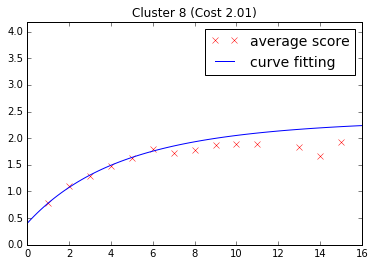

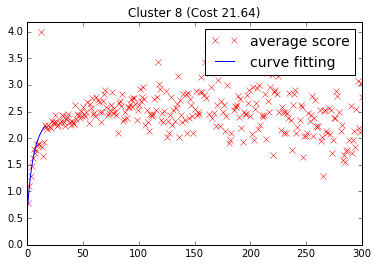

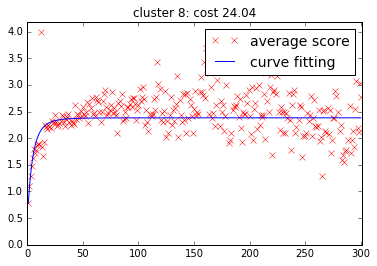

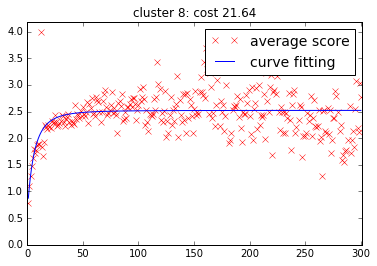

cluster 9:
 - Curve Fitting Parameters: [  8.37984421e+01   1.68742118e-02   8.20740344e+01   5.11838953e+00]
 - Curve Fitting Cost: 1.9293744227797995

 - Curve Fitting Parameters: [ 2.96945369  0.20140942  3.84263438 -0.32408877]
 - Curve Fitting Cost: 36.708723808091975



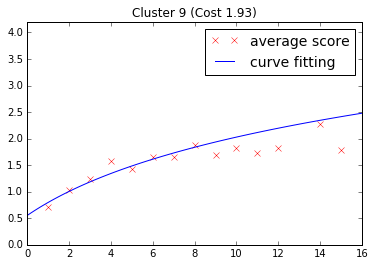

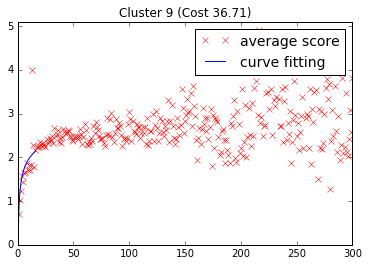

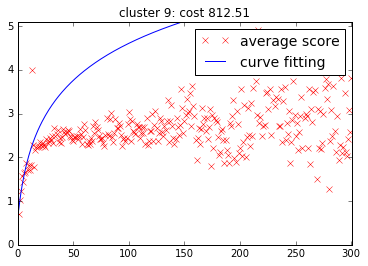

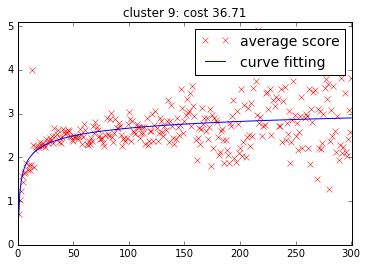

cluster 10:
 - Curve Fitting Parameters: [  7.96984000e+12   1.02672352e+01   2.02433476e+00   1.64691233e+01]
 - Curve Fitting Cost: 1.1247198189986853

 - Curve Fitting Parameters: [ 11.54662421   0.0311959   12.74922494  -0.72618016]
 - Curve Fitting Cost: 35.99981221162522



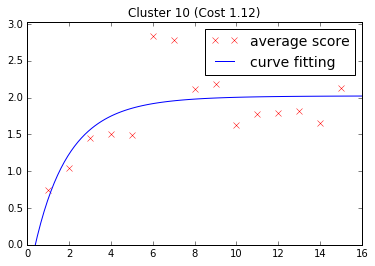

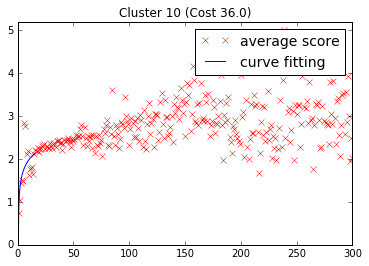

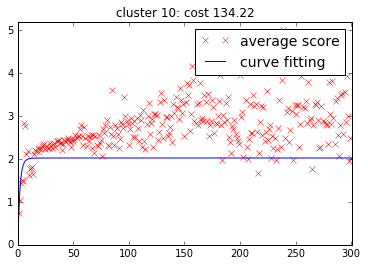

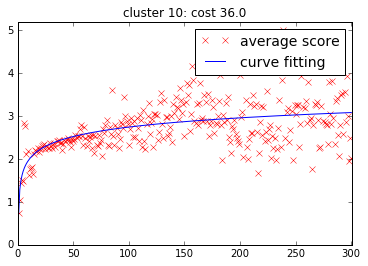

cluster 11:
 - Curve Fitting Parameters: [  5.89162406e+10   8.25942555e+00   2.13678950e+00   1.84868762e+01]
 - Curve Fitting Cost: 2.9189647015946094

 - Curve Fitting Parameters: [ 2.9832961   0.44243617  3.10745765  0.98996002]
 - Curve Fitting Cost: 42.42603851096585



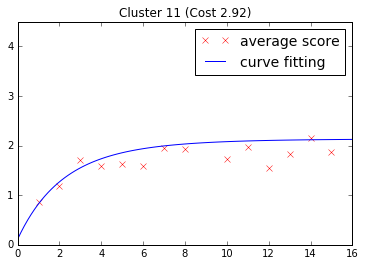

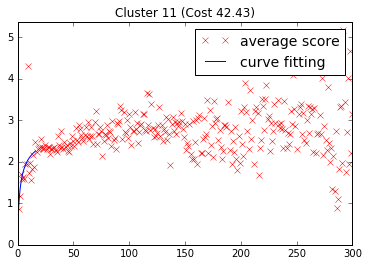

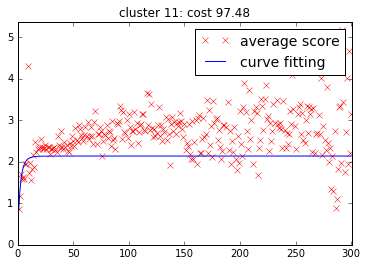

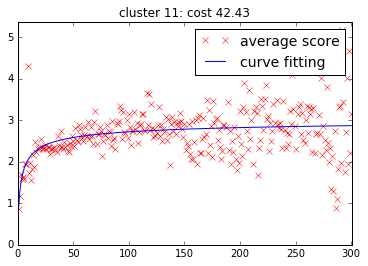

cluster 12:
 - Curve Fitting Parameters: [ -2.05496528e-05   6.77404232e+00   2.01811798e+00  -8.24584315e-01]
 - Curve Fitting Cost: 0.0688319151195236

 - Curve Fitting Parameters: [  4.01082503e+03   5.31659789e-02   2.40138588e+03   1.57494146e+04]
 - Curve Fitting Cost: 114.41958109439429



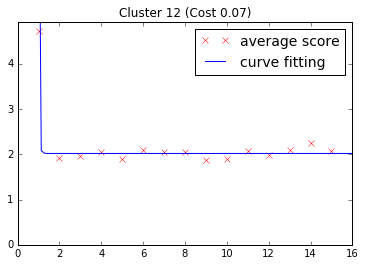

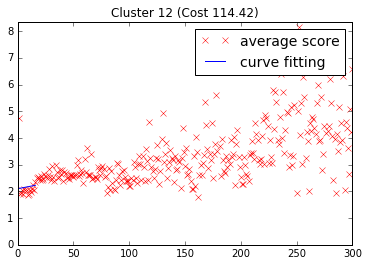

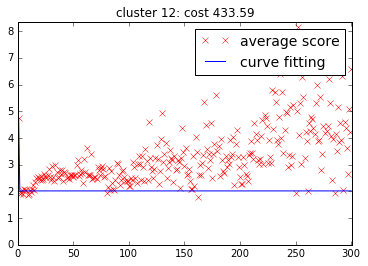

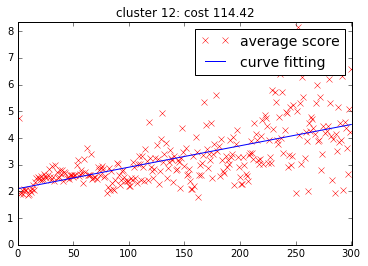

cluster 13:
 - Curve Fitting Parameters: [  1.72253982e+03   1.46949549e-01   6.61225307e+02   6.79694183e+02]
 - Curve Fitting Cost: 1.885572441905531

 - Curve Fitting Parameters: [  3.96561211e+02   9.09060198e-04   3.97601637e+02  -7.10172741e-01]
 - Curve Fitting Cost: 30.82379028977818



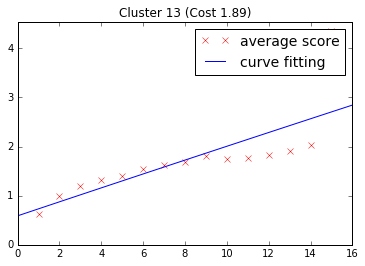

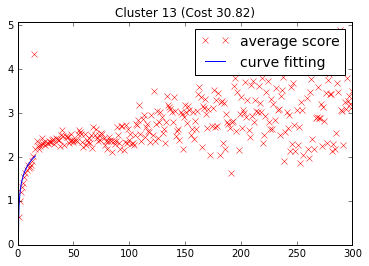

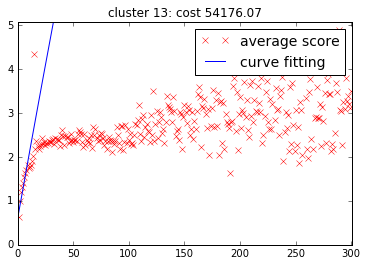

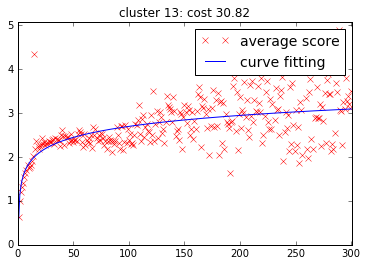

In [29]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/single/")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw4/single/sample{0}".format(i+1), clt_num = i+1)

    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/powerlaw4/single/dummy", clt_num = i+1)


    y_fit_valid = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    y_fit_true = cv.powerlaw_curve4(attempts300, true_opt[0], true_opt[1], true_opt[2], true_opt[3])
    
    pl4_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl4_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/powerlaw4/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl4_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/powerlaw4/single/true{0}".format(i+1), 
              clt_num=i+1, cost = pl4_cost_true)

# 2. Multiple Curves
## 2-1. Two parameters
#### 1) two curves

cluster 1:
 - break point: 10
cluster 2:
 - break point: 10
cluster 3:
 - break point: 30
cluster 4:
 - break point: 30
cluster 5:
 - break point: 10
cluster 6:
 - break point: 40
cluster 7:
 - break point: 10
cluster 8:
 - break point: 40
cluster 9:
 - break point: 10
cluster 10:
 - break point: 10
cluster 11:
 - break point: 10
cluster 12:
 - break point: 30
cluster 13:
 - break point: 20


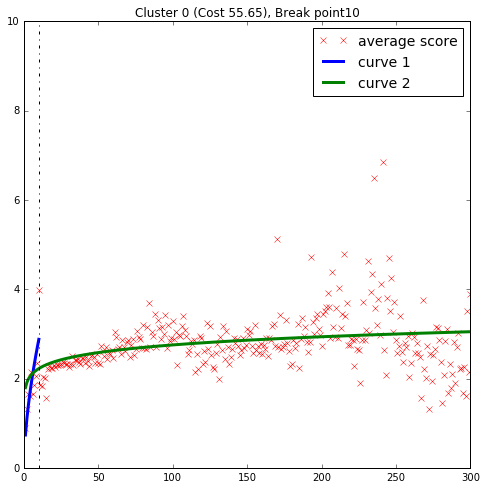

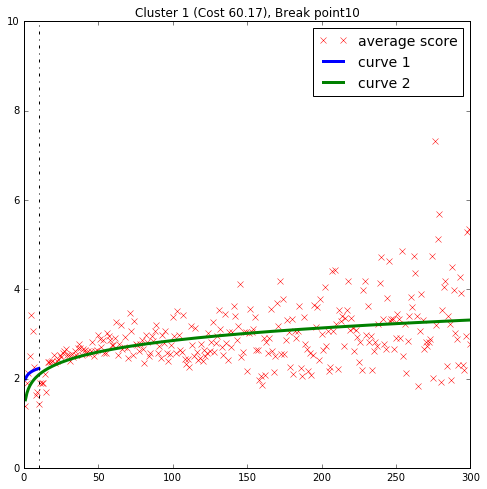

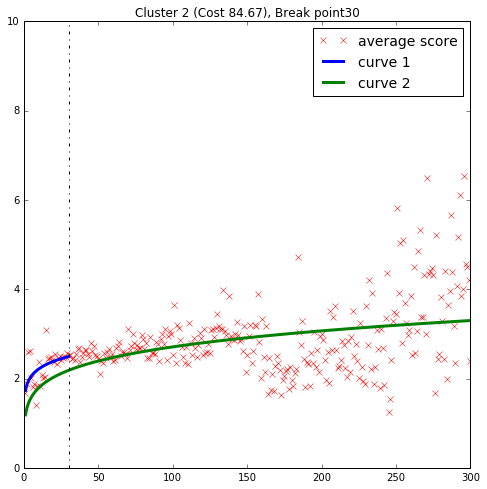

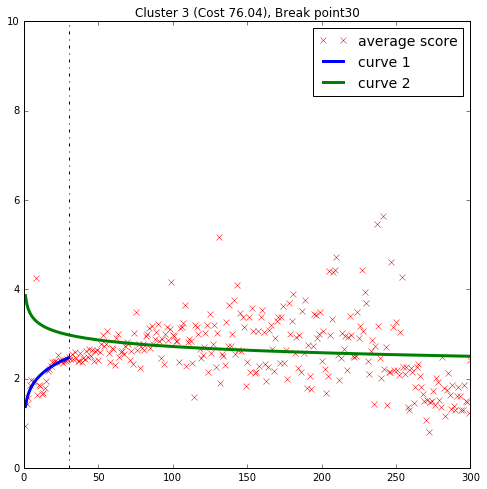

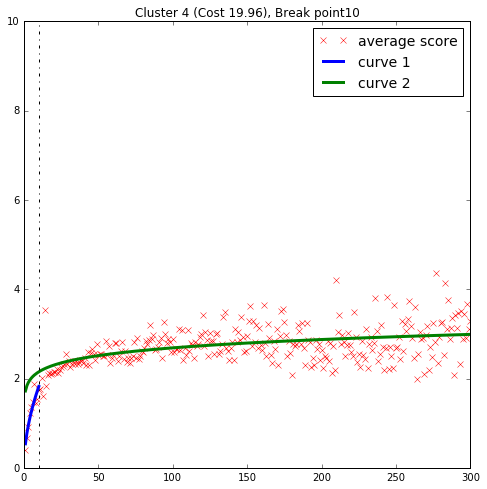

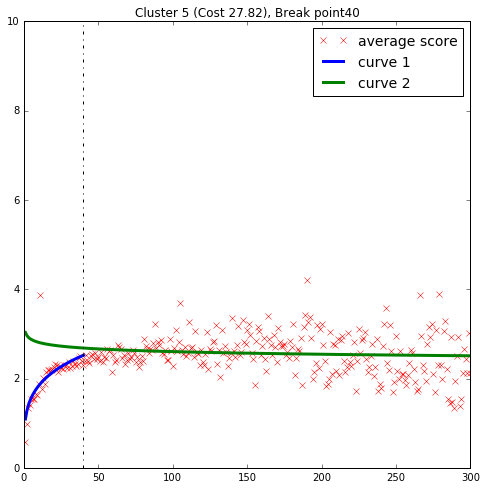

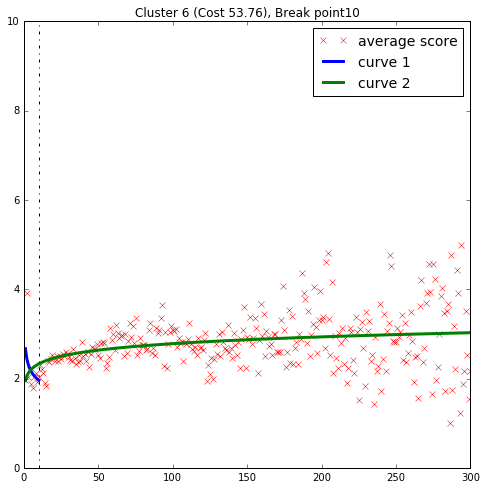

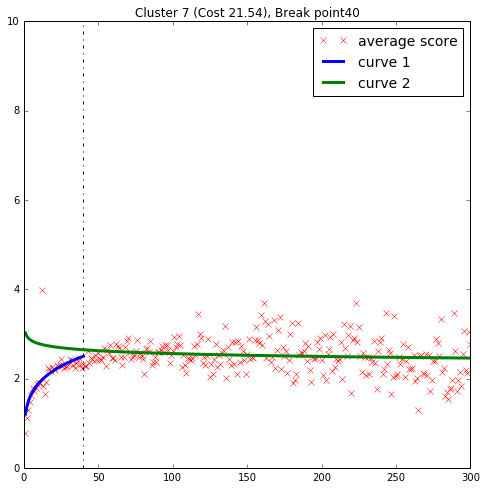

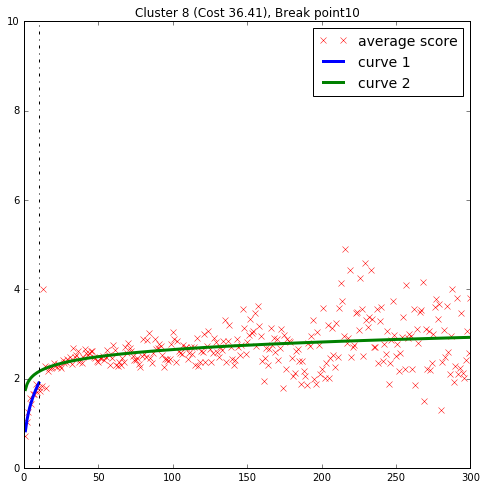

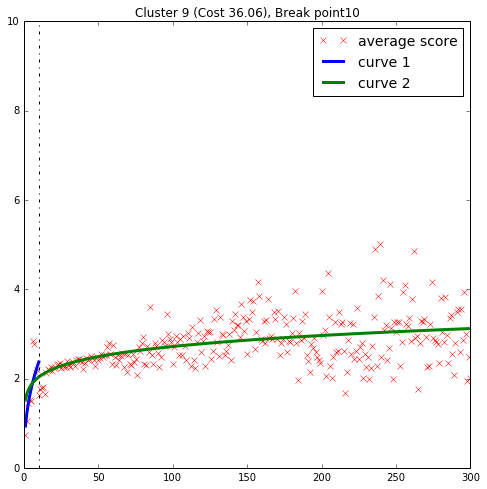

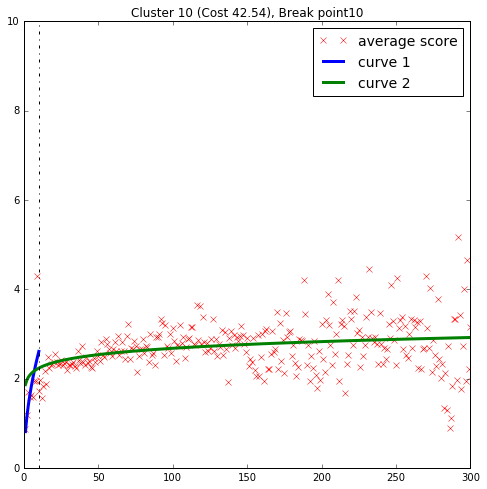

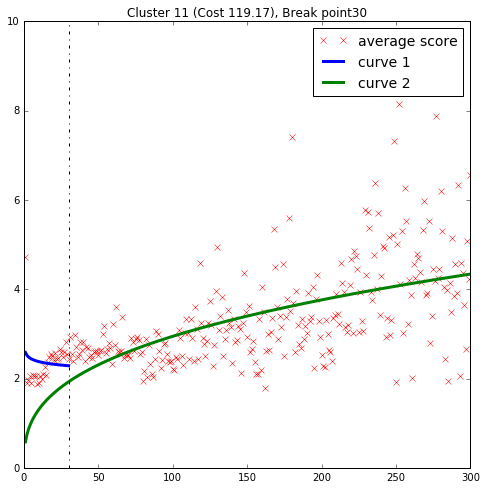

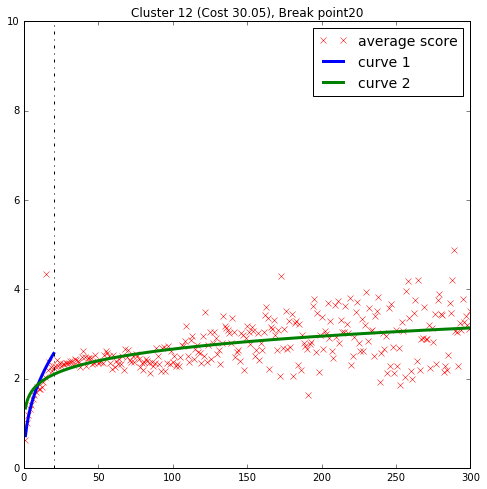

In [5]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/two/")

seed = [1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least2, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least2, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve2(x_range[:p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.powerlaw_curve2(x_range, lsq2.x[0], lsq2.x[1])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    #ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw2/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 1) three curves

cluster 1:
 - break point: 10 and 30
cluster 2:
 - break point: 10 and 30
cluster 3:
 - break point: 20 and 30
cluster 4:
 - break point: 20 and 30
cluster 5:
 - break point: 10 and 30
cluster 6:
 - break point: 10 and 30
cluster 7:
 - break point: 10 and 30
cluster 8:
 - break point: 20 and 30
cluster 9:
 - break point: 10 and 20
cluster 10:
 - break point: 10 and 20
cluster 11:
 - break point: 10 and 20
cluster 12:
 - break point: 20 and 30
cluster 13:
 - break point: 20 and 30


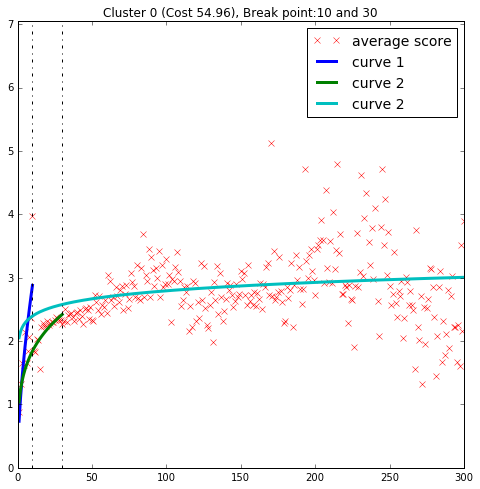

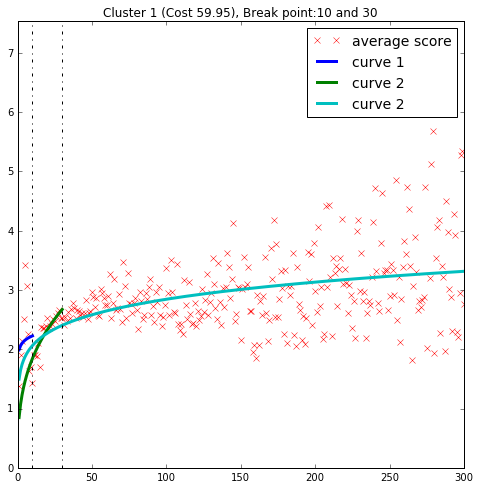

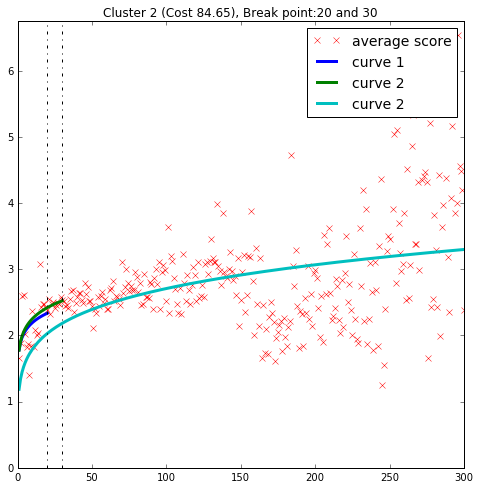

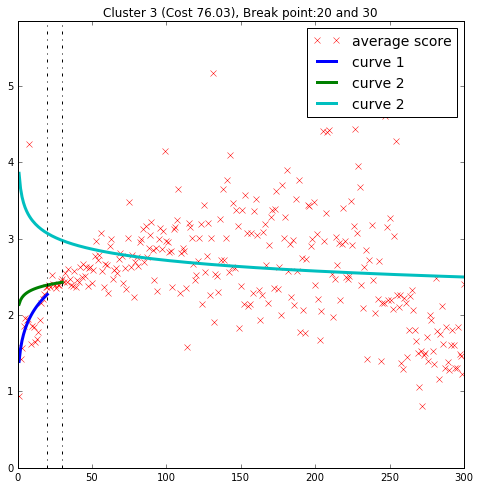

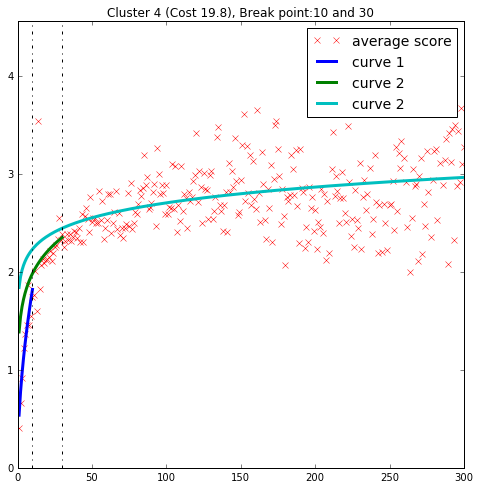

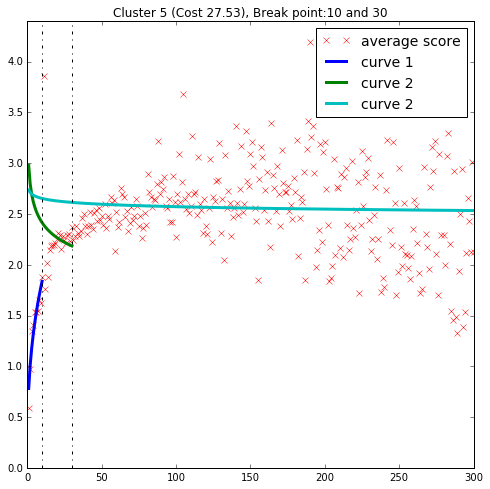

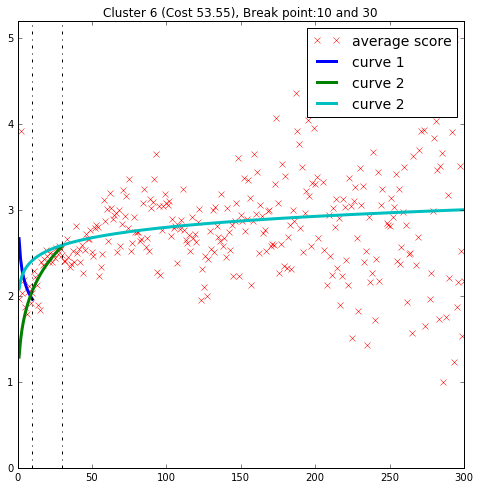

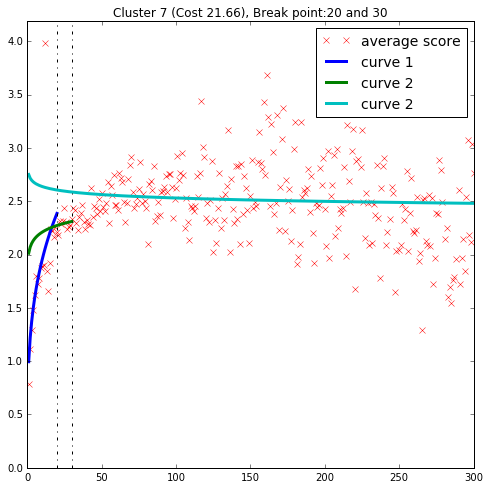

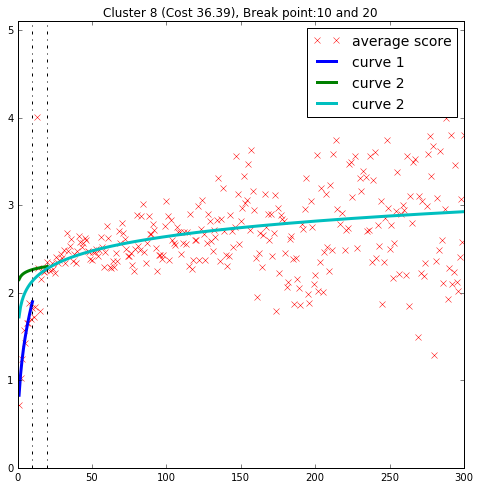

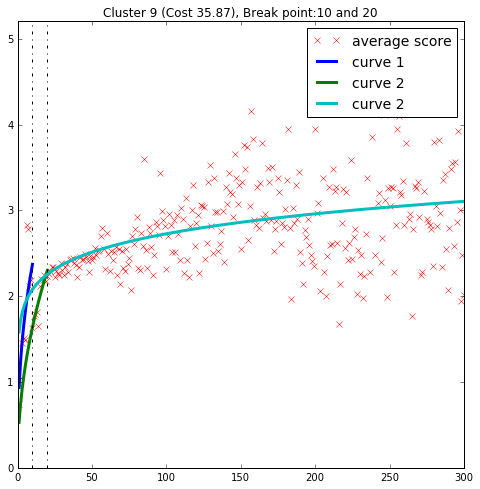

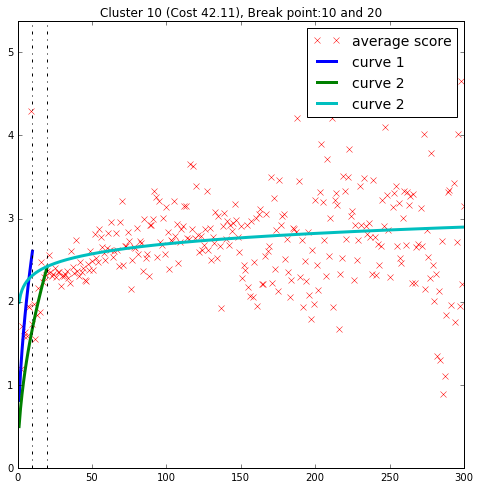

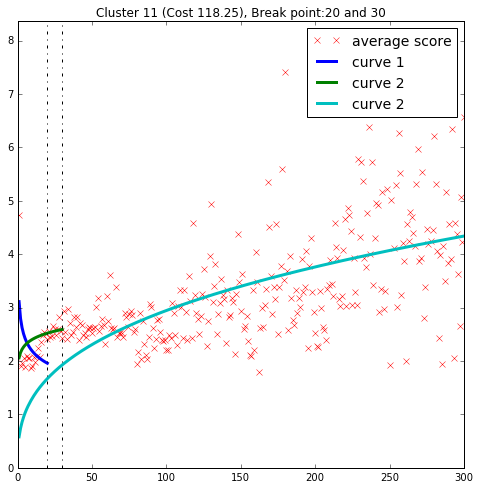

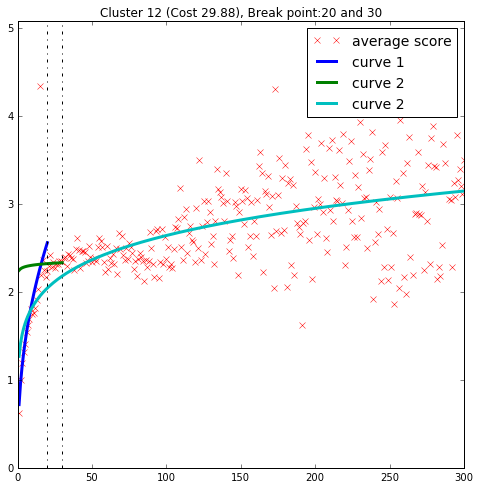

In [6]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least2, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least2, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least2, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve2(x_range[:p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.powerlaw_curve2(x_range[:p2], lsq2.x[0], lsq2.x[1])
    pred_y3 = cv.powerlaw_curve2(x_range, lsq3.x[0], lsq3.x[1])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw2/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Three parameters
#### 1) two curves

cluster 1:
 - break point: 250
cluster 2:
 - break point: 180
cluster 3:
 - break point: 250
cluster 4:
 - break point: 250
cluster 5:
 - break point: 190
cluster 6:
 - break point: 200
cluster 7:
 - break point: 210
cluster 8:
 - break point: 230
cluster 9:
 - break point: 210
cluster 10:
 - break point: 190
cluster 11:
 - break point: 280
cluster 12:
 - break point: 210
cluster 13:
 - break point: 80


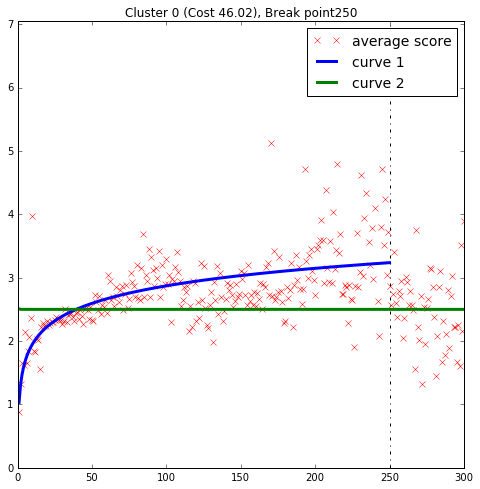

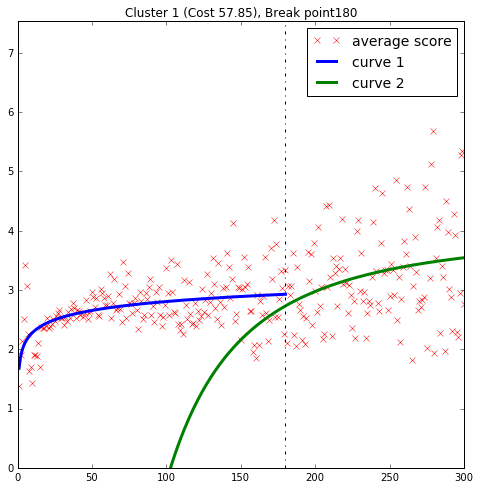

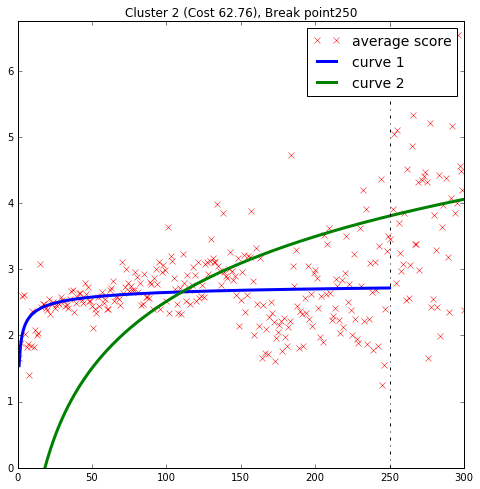

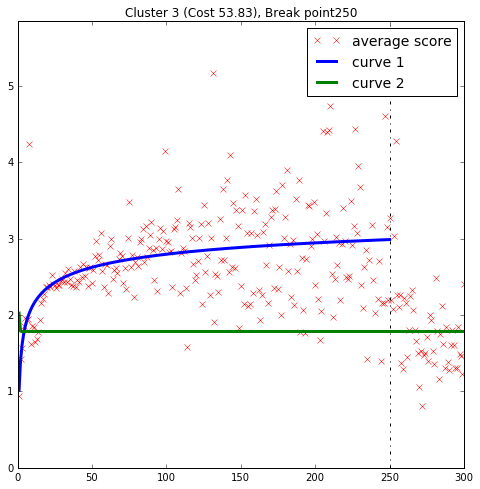

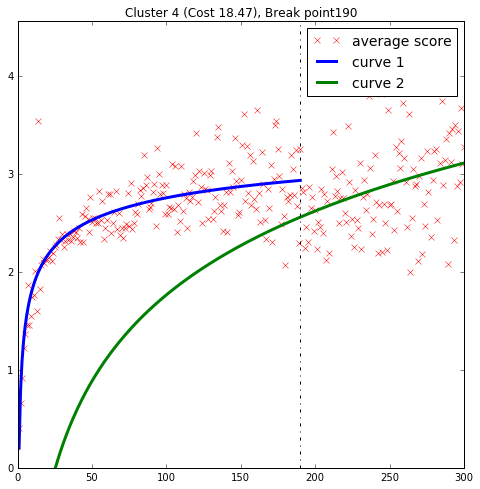

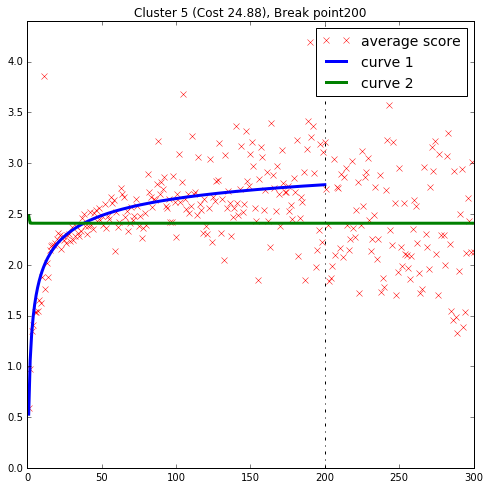

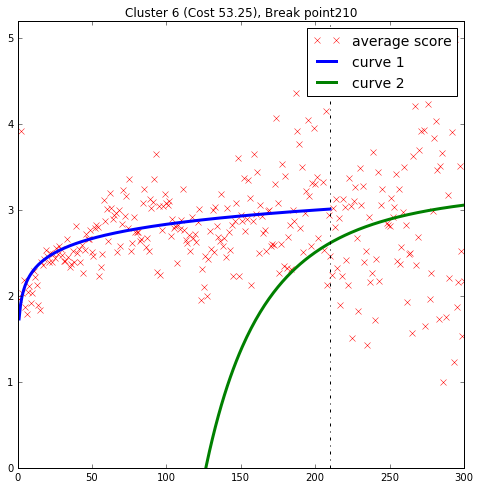

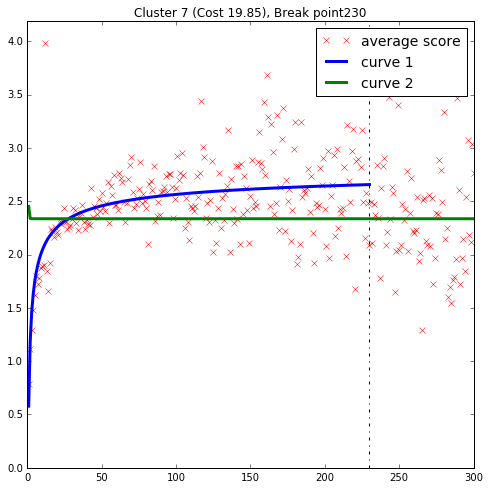

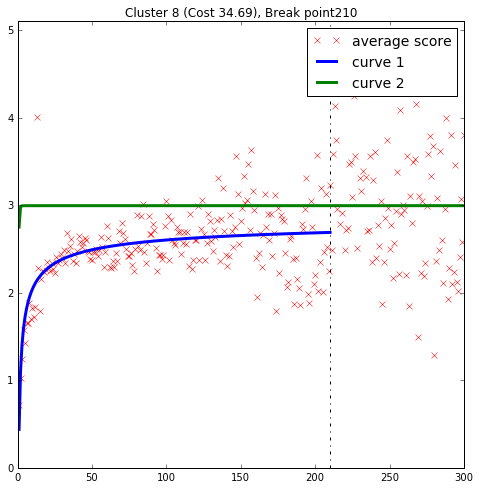

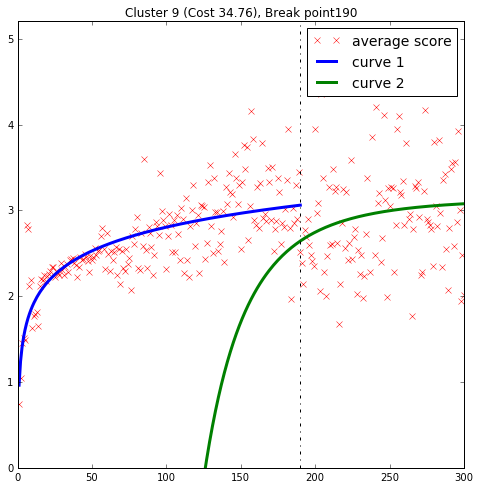

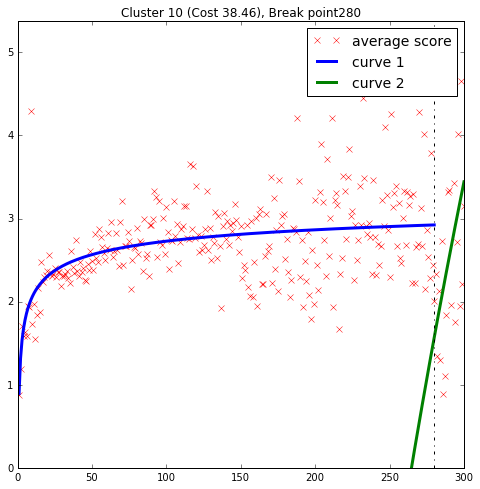

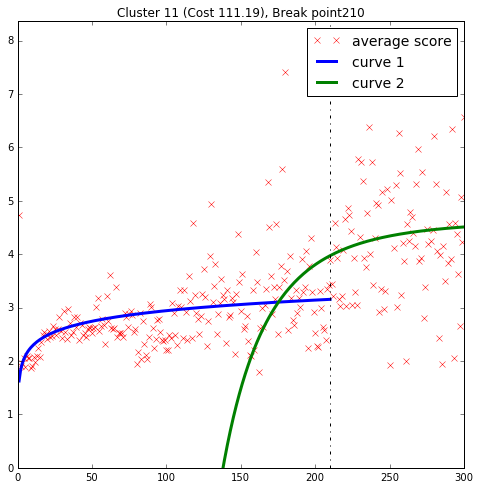

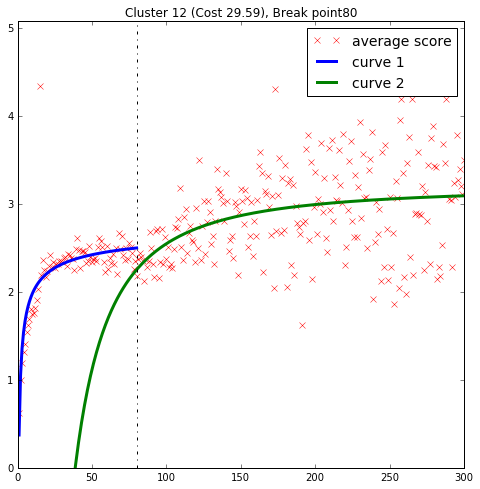

In [7]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/two/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least3, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve3(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.powerlaw_curve3(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw3/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

cluster 1:
 - break point: 240 and 250
cluster 2:
 - break point: 270 and 280
cluster 3:
 - break point: 250 and 290
cluster 4:
 - break point: 250 and 260
cluster 5:
 - break point: 180 and 190
cluster 6:
 - break point: 200 and 280
cluster 7:
 - break point: 200 and 210
cluster 8:
 - break point: 230 and 280
cluster 9:
 - break point: 210 and 240
cluster 10:
 - break point: 230 and 240
cluster 11:
 - break point: 280 and 290
cluster 12:
 - break point: 170 and 180
cluster 13:
 - break point: 280 and 290


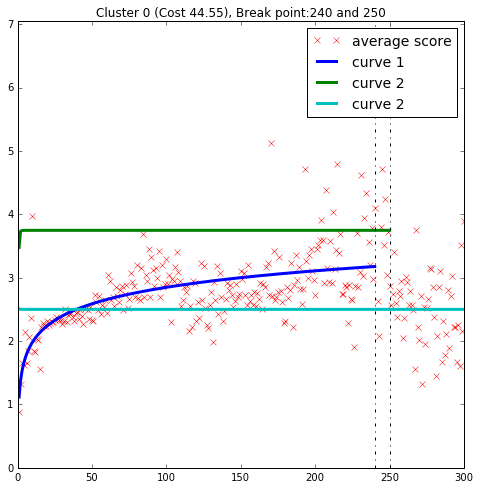

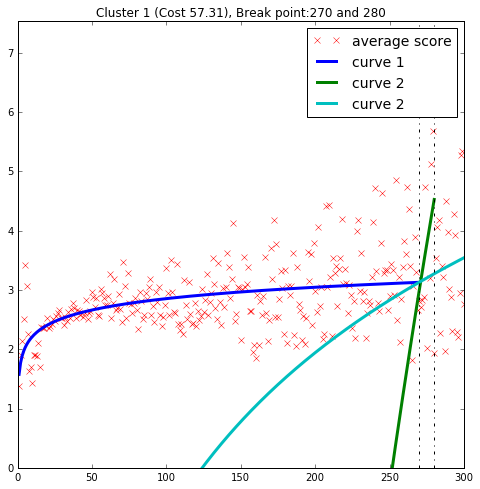

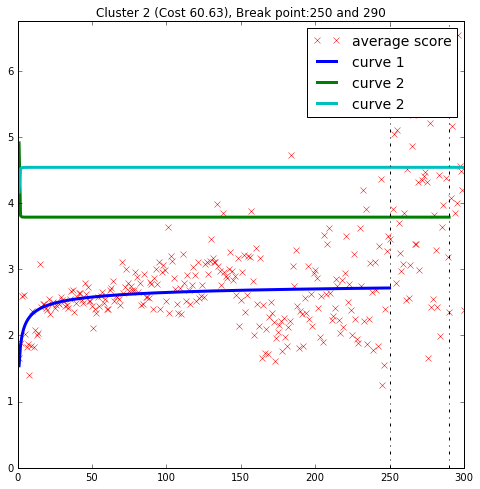

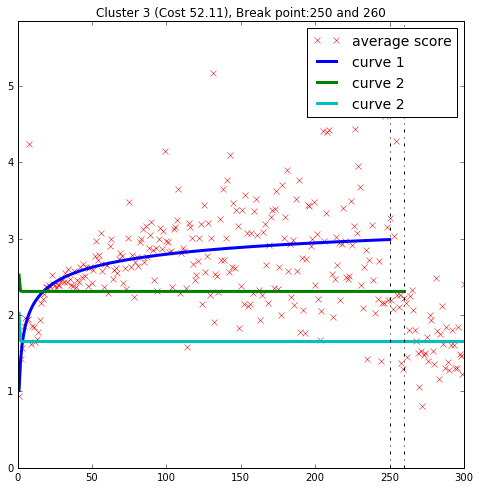

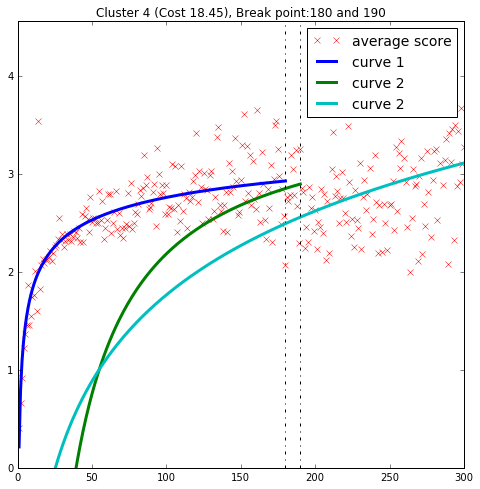

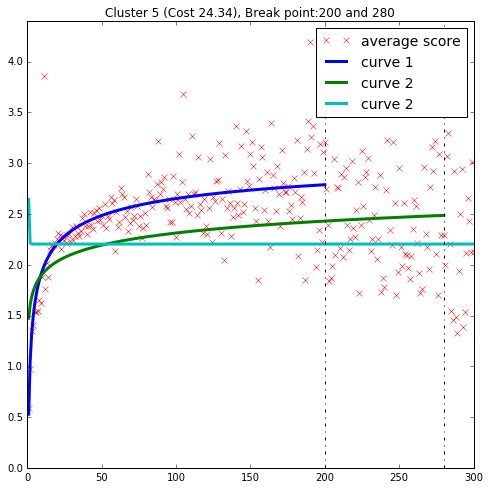

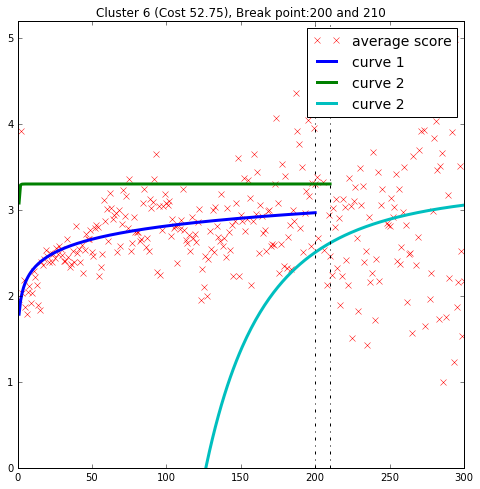

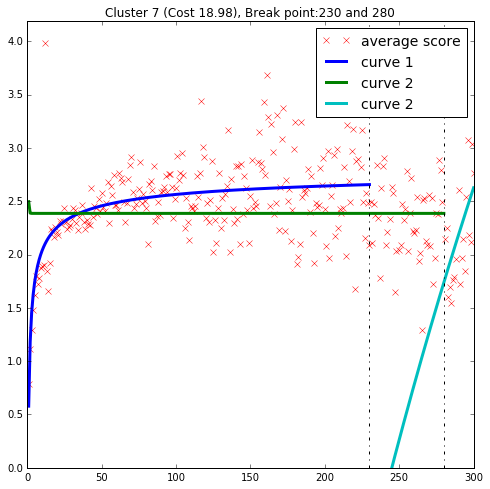

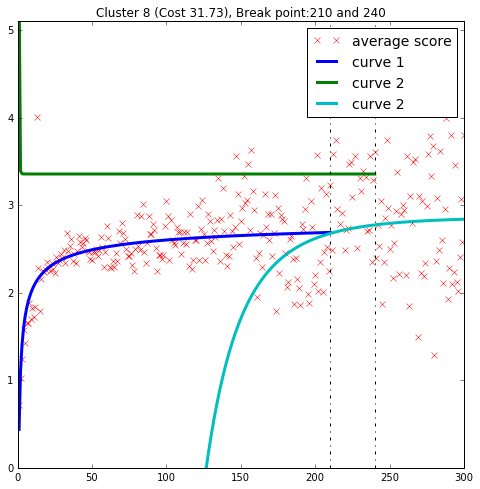

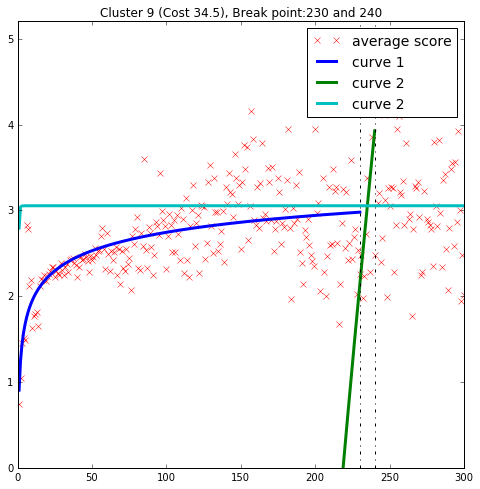

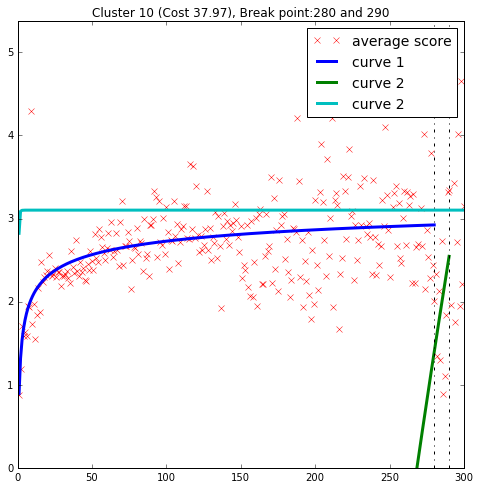

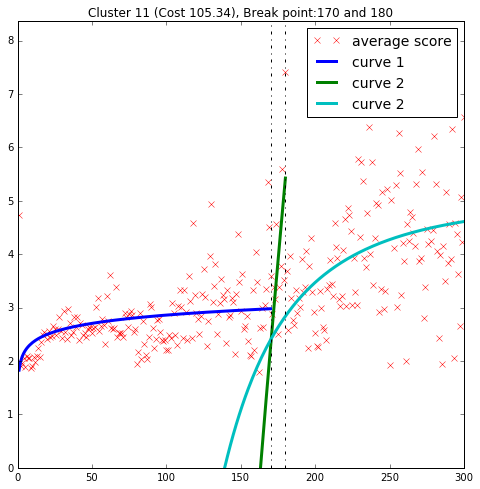

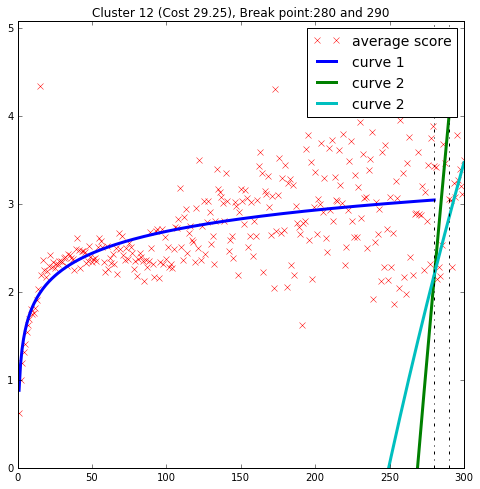

In [8]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least3, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least3, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least3, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve3(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.powerlaw_curve3(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2])
    pred_y3 = cv.powerlaw_curve3(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw3/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Four parameters
#### 1) two curves

cluster 1:
 - break point: 250
cluster 2:
 - break point: 190
cluster 3:
 - break point: 250
cluster 4:
 - break point: 250
cluster 5:
 - break point: 190
cluster 6:
 - break point: 200
cluster 7:
 - break point: 210
cluster 8:
 - break point: 230
cluster 9:
 - break point: 210
cluster 10:
 - break point: 190
cluster 11:
 - break point: 280
cluster 12:
 - break point: 200
cluster 13:
 - break point: 100


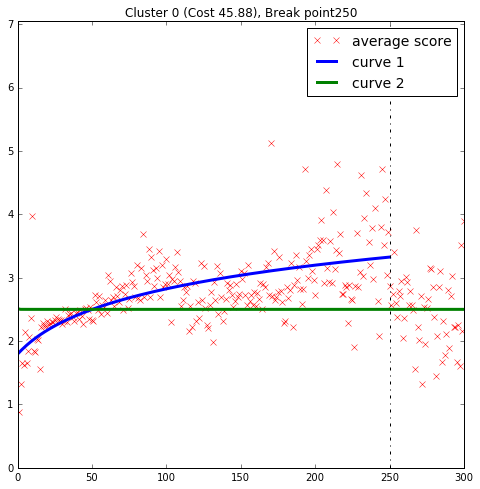

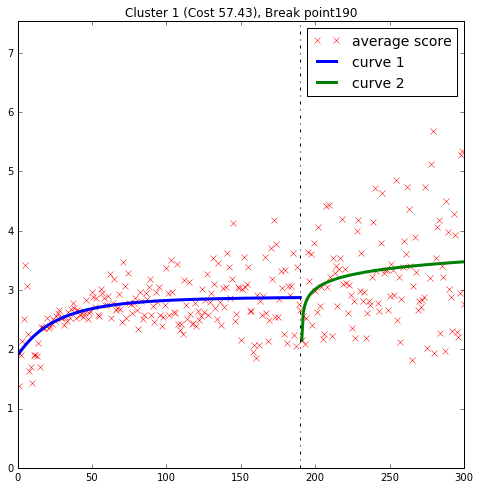

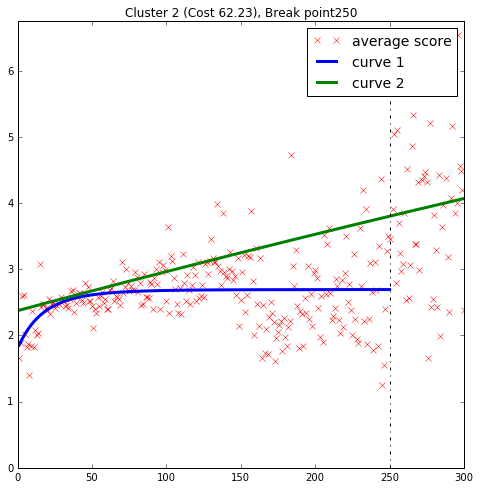

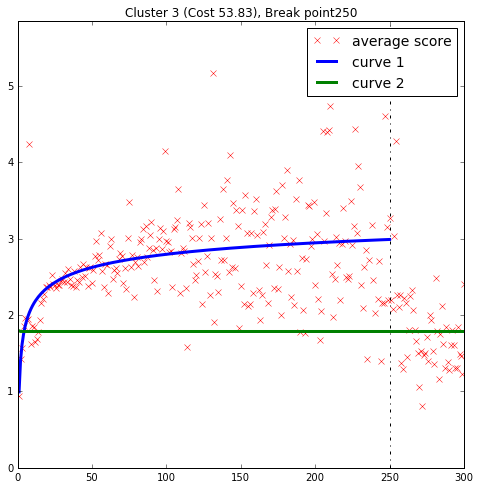

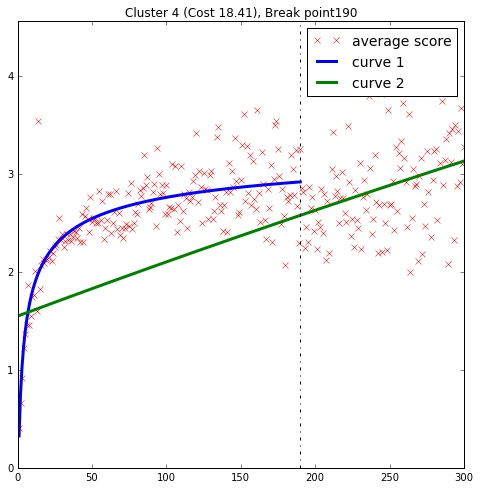

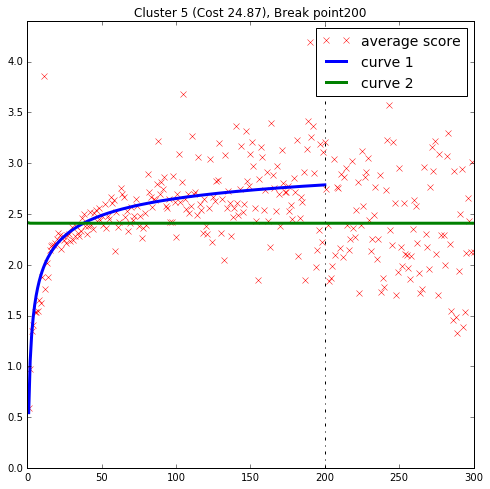

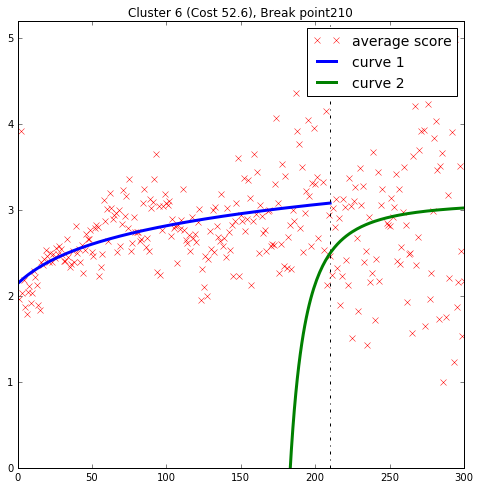

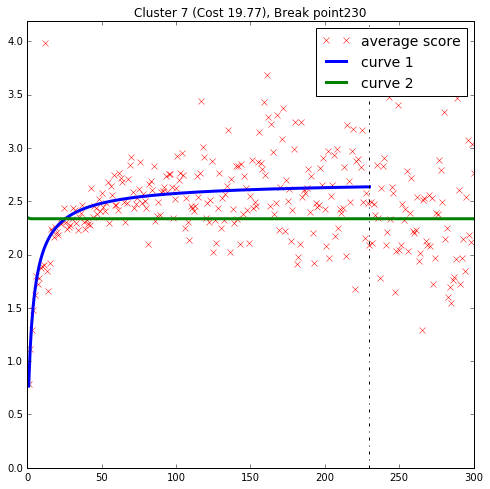

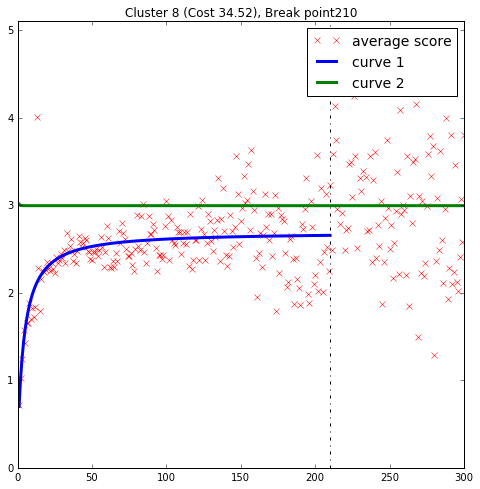

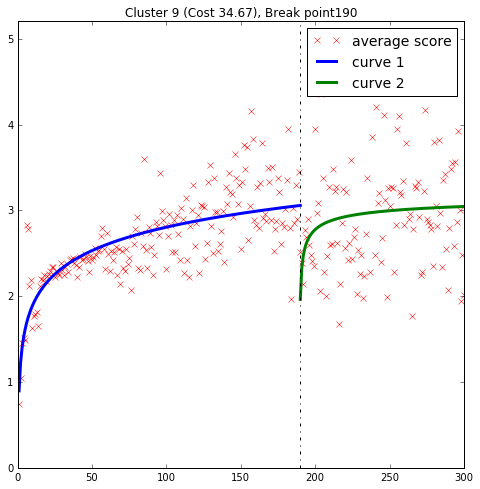

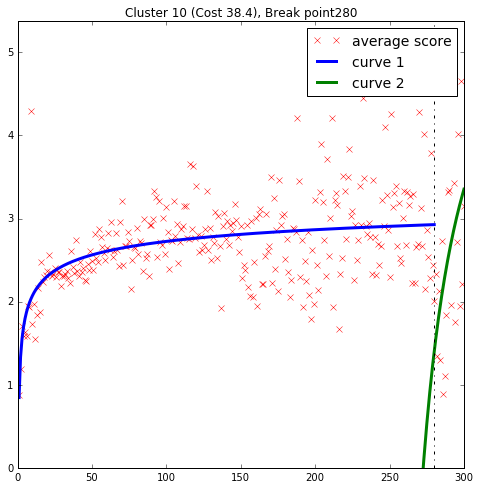

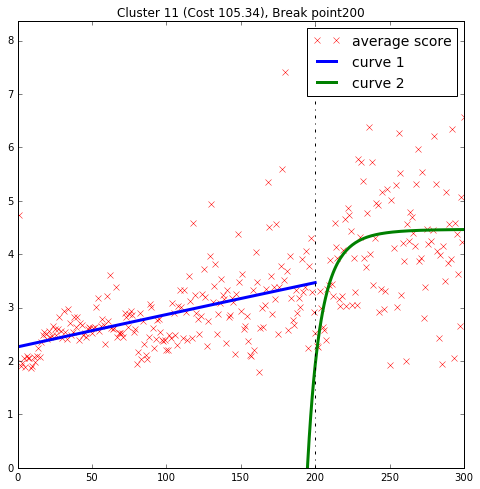

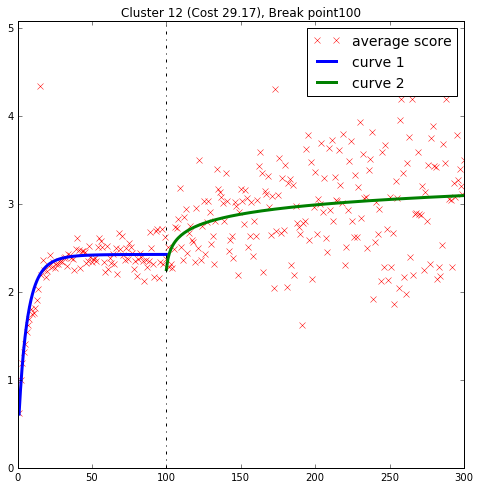

In [9]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/two/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.powerlaw_least4, eval("avg{0}".format(i+1)), seed, min_range=10)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.powerlaw_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least4, seed, args=(x2, true_y2))

    pred_y1 = cv.powerlaw_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.powerlaw_curve4(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point: {2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw4/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

../../Figs/curve_fitting/powerlaw4/three/ already present - Skipping pickling.
cluster 1:
 - break point: 260
cluster 2:
 - break point: 200
cluster 3:
 - break point: 160
cluster 4:
 - break point: 240
cluster 5:
 - break point: 240
cluster 6:
 - break point: 200
cluster 7:
 - break point: 180
cluster 8:
 - break point: 260
cluster 9:
 - break point: 200
cluster 10:
 - break point: 140
cluster 11:
 - break point: 260
cluster 12:
 - break point: 160
cluster 13:
 - break point: 100


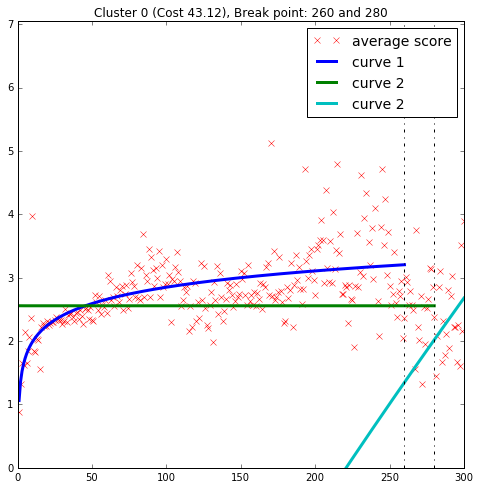

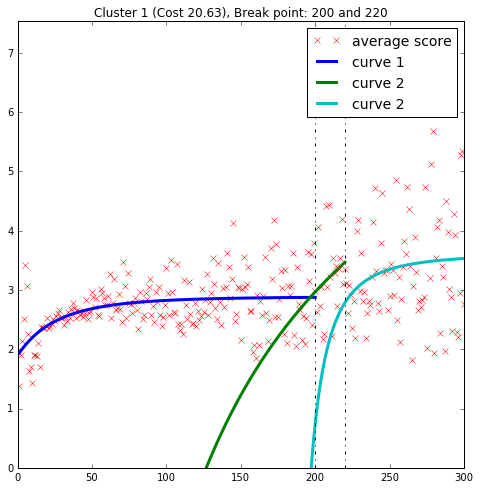

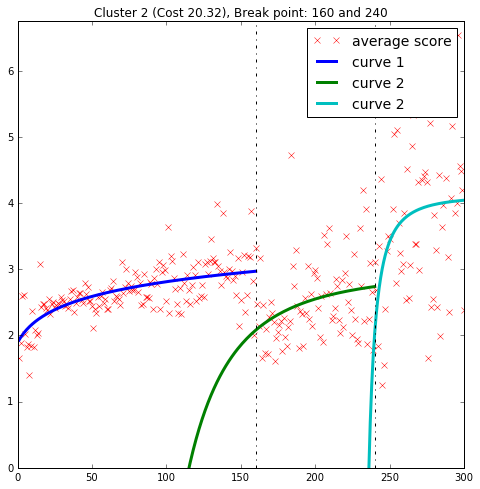

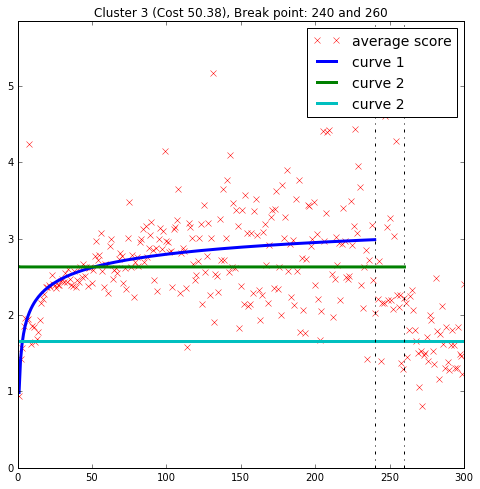

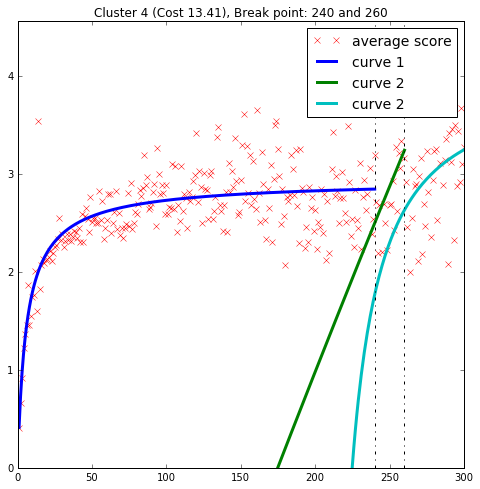

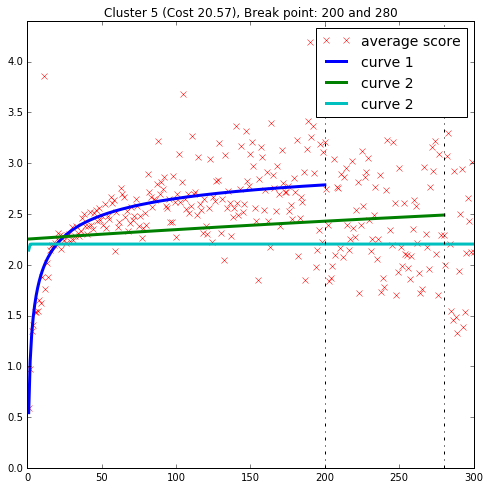

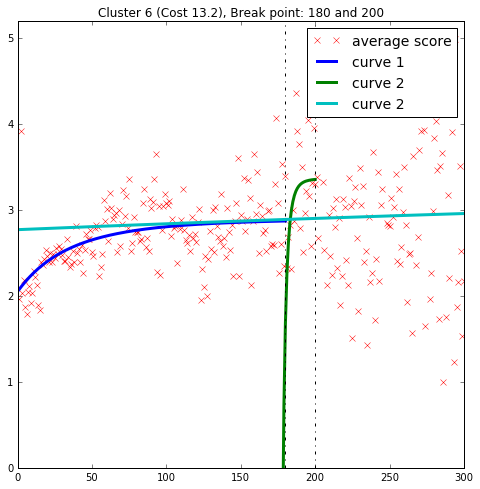

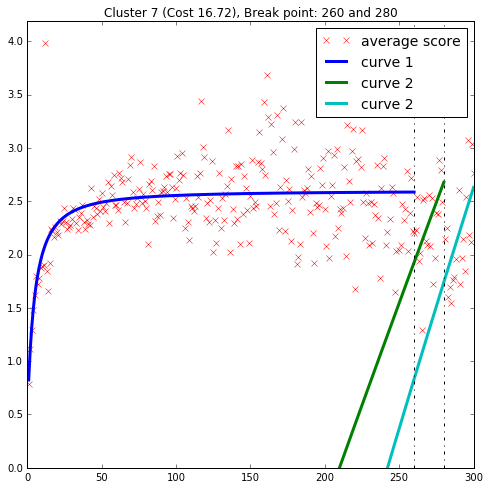

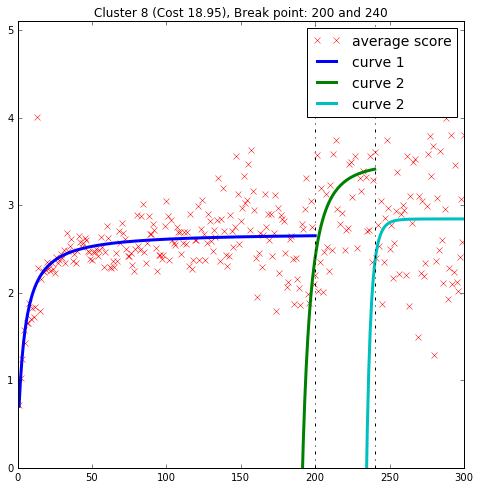

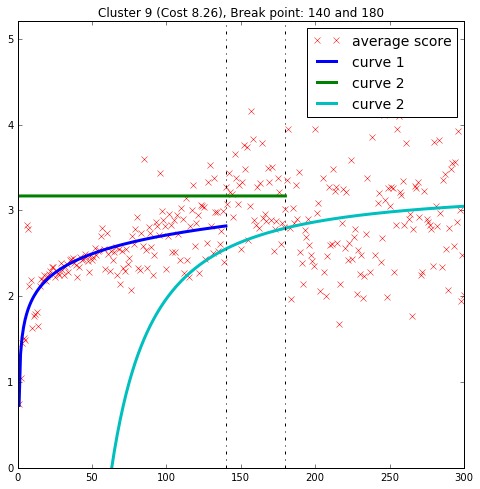

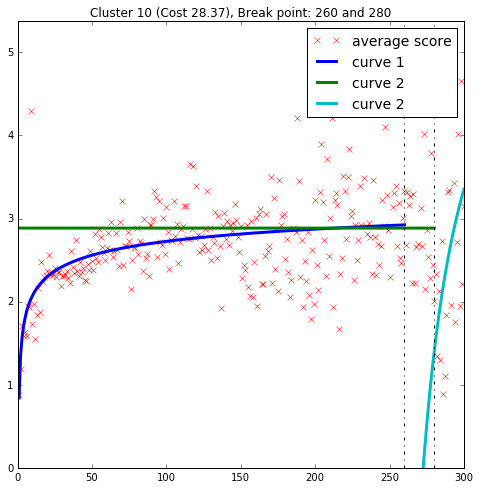

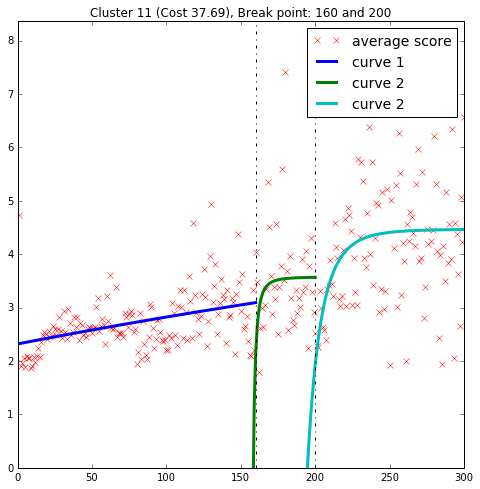

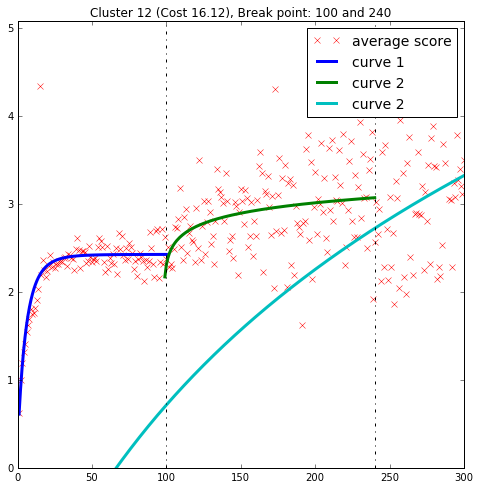

In [32]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/three/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.powerlaw_least4, eval("avg{0}".format(i+1)), seed, min_range=20)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.powerlaw_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.powerlaw_least4, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.powerlaw_least4, seed, args=(x3, true_y3))

    pred_y1 = cv.powerlaw_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.powerlaw_curve4(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])
    pred_y3 = cv.powerlaw_curve4(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2], lsq3.x[3])

    print(" - break point: {0} and {1}".format(p1, p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point: {2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1, p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/powerlaw4/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()